<a href="https://colab.research.google.com/github/devendrajadhav2470/Brain-Stroke-Prediction/blob/main/Group63_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRML Major Project**

# **Devendra Bhaginath Jadhav (B21AI013)**

# **Khushal Damor (B21AI018)**

# **Lakshya Garg (B21AI019)**

# **Project Title : Brain Stroke Prediction**

# **1. Setup**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.model_selection import train_test_split

def Splitter(input = None, output = None, train_size = None):

  x_train,x_test,y_train,y_test = train_test_split(input,output,test_size= 1-train_size,random_state = 31)
  return x_train,x_test,y_train,y_test

In [ ]:
from sklearn.metrics import roc_curve, auc

def ROC(x=None,y=None,m=None,label='Default'):

  temp_predict = m.predict_proba(x)
  fpr, tpr, thresholds = roc_curve(y, temp_predict[:, 1])

  plt.plot(fpr,tpr,label=label)
  plt.title("ROC Curve")
  plt.xlabel("False Positive Rate (FPR)")
  plt.ylabel("True Positive Rate (TPR)")

  return auc(fpr,tpr)

In [ ]:
from sklearn.metrics import  confusion_matrix,ConfusionMatrixDisplay

def ConfusionMatrix(x=None,y=None,m=None,title="Default"):

  y1 = y.copy()
  x1 = x.copy()

  temp_pred = pd.DataFrame(m.predict(x))

  temp_pred[temp_pred==0] = 'No Stroke'
  temp_pred[temp_pred==1] = 'Stroke'

  y1.replace({0:'No Stroke',1:'Stroke'},inplace=True)

  cm_temp = confusion_matrix(y1,np.array(temp_pred),labels=['No Stroke','Stroke'])
  disp_temp = ConfusionMatrixDisplay(confusion_matrix=cm_temp,display_labels=['No Stroke','Stroke'])
  disp_temp.plot(cmap="GnBu")
  plt.title(title)
  plt.show()

In [ ]:
brain_stroke_data = pd.read_csv("https://raw.githubusercontent.com/Khushal-31/PRML_Lab/main/brain_stroke.csv")
brain_stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# **2. Exploratory Data Analysis (EDA)**

In [ ]:
# Creating a temporary copy of the dataset

brain_stroke_data_temp = brain_stroke_data.copy()

In [ ]:
# Checking the unique values of attributes with 'object' datatype

print("gender         : ",np.unique(brain_stroke_data_temp.iloc[:,0]))
print("ever_married   : ",np.unique(brain_stroke_data_temp.iloc[:,4]))
print("work_type      : ",np.unique(brain_stroke_data_temp.iloc[:,5]))
print("Residence_type : ",np.unique(brain_stroke_data_temp.iloc[:,6]))
print("smoking_status : ",np.unique(brain_stroke_data_temp.iloc[:,9]))

gender         :  ['Female' 'Male']
ever_married   :  ['No' 'Yes']
work_type      :  ['Govt_job' 'Private' 'Self-employed' 'children']
Residence_type :  ['Rural' 'Urban']
smoking_status :  ['Unknown' 'formerly smoked' 'never smoked' 'smokes']


In [ ]:
# Encoding categorical values to numerical values

e1 = { "gender" : {"Female" : 0, "Male" : 1} }
brain_stroke_data_temp.replace(e1,inplace=True)

e2 = { "ever_married" : {"No" : 0, "Yes" : 1} }
brain_stroke_data_temp.replace(e2,inplace=True)

e3 = { "work_type" : {"Govt_job" : 0, "Private" : 1, "Self-employed" : 2, "children" : 3} }
brain_stroke_data_temp.replace(e3,inplace=True)

e4 = { "Residence_type" : {"Rural" : 0, "Urban" : 1} }
brain_stroke_data_temp.replace(e4,inplace=True)

e5 = { "smoking_status" : {"Unknown" : 0, "formerly smoked" : 1,"never smoked" : 2, "smokes" : 3} }
brain_stroke_data_temp.replace(e5,inplace=True)

In [ ]:
# Description of the dataset

brain_stroke_data_temp.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [ ]:
# Information about the dataset

brain_stroke_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


<Axes: >

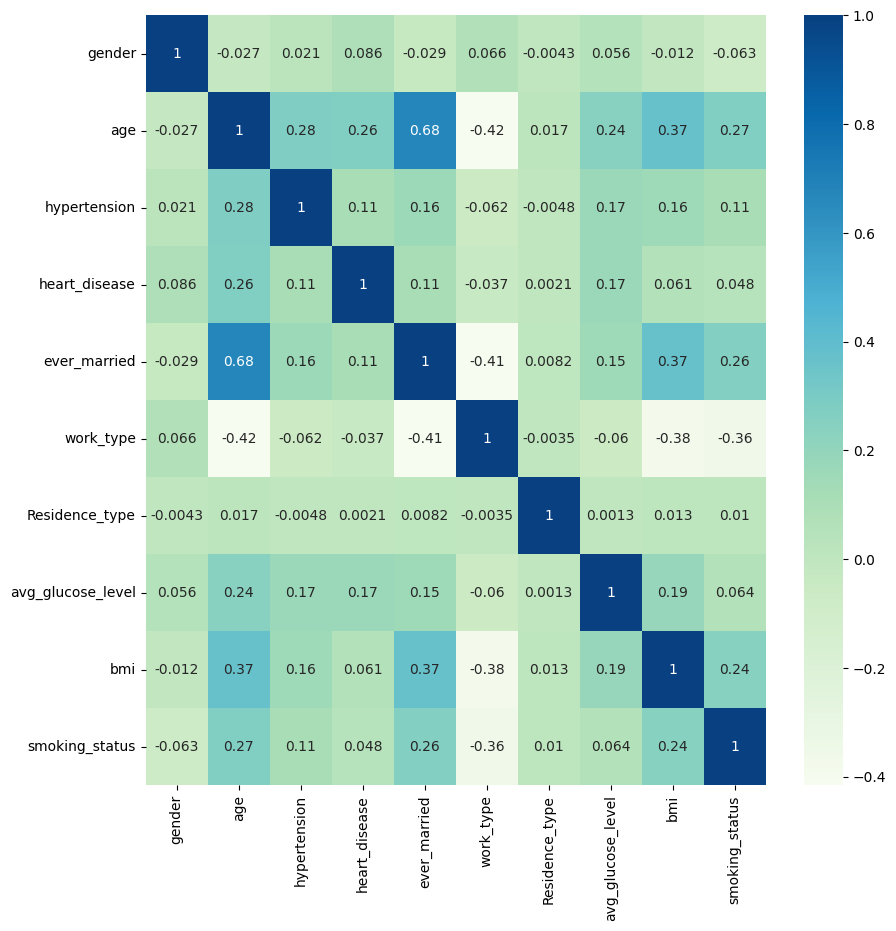

In [ ]:
# Correlation matrix

plt.figure(figsize=(10,10))
sns.heatmap(brain_stroke_data_temp.iloc[:,:10].corr(),cbar=True,annot=True,cmap='GnBu')

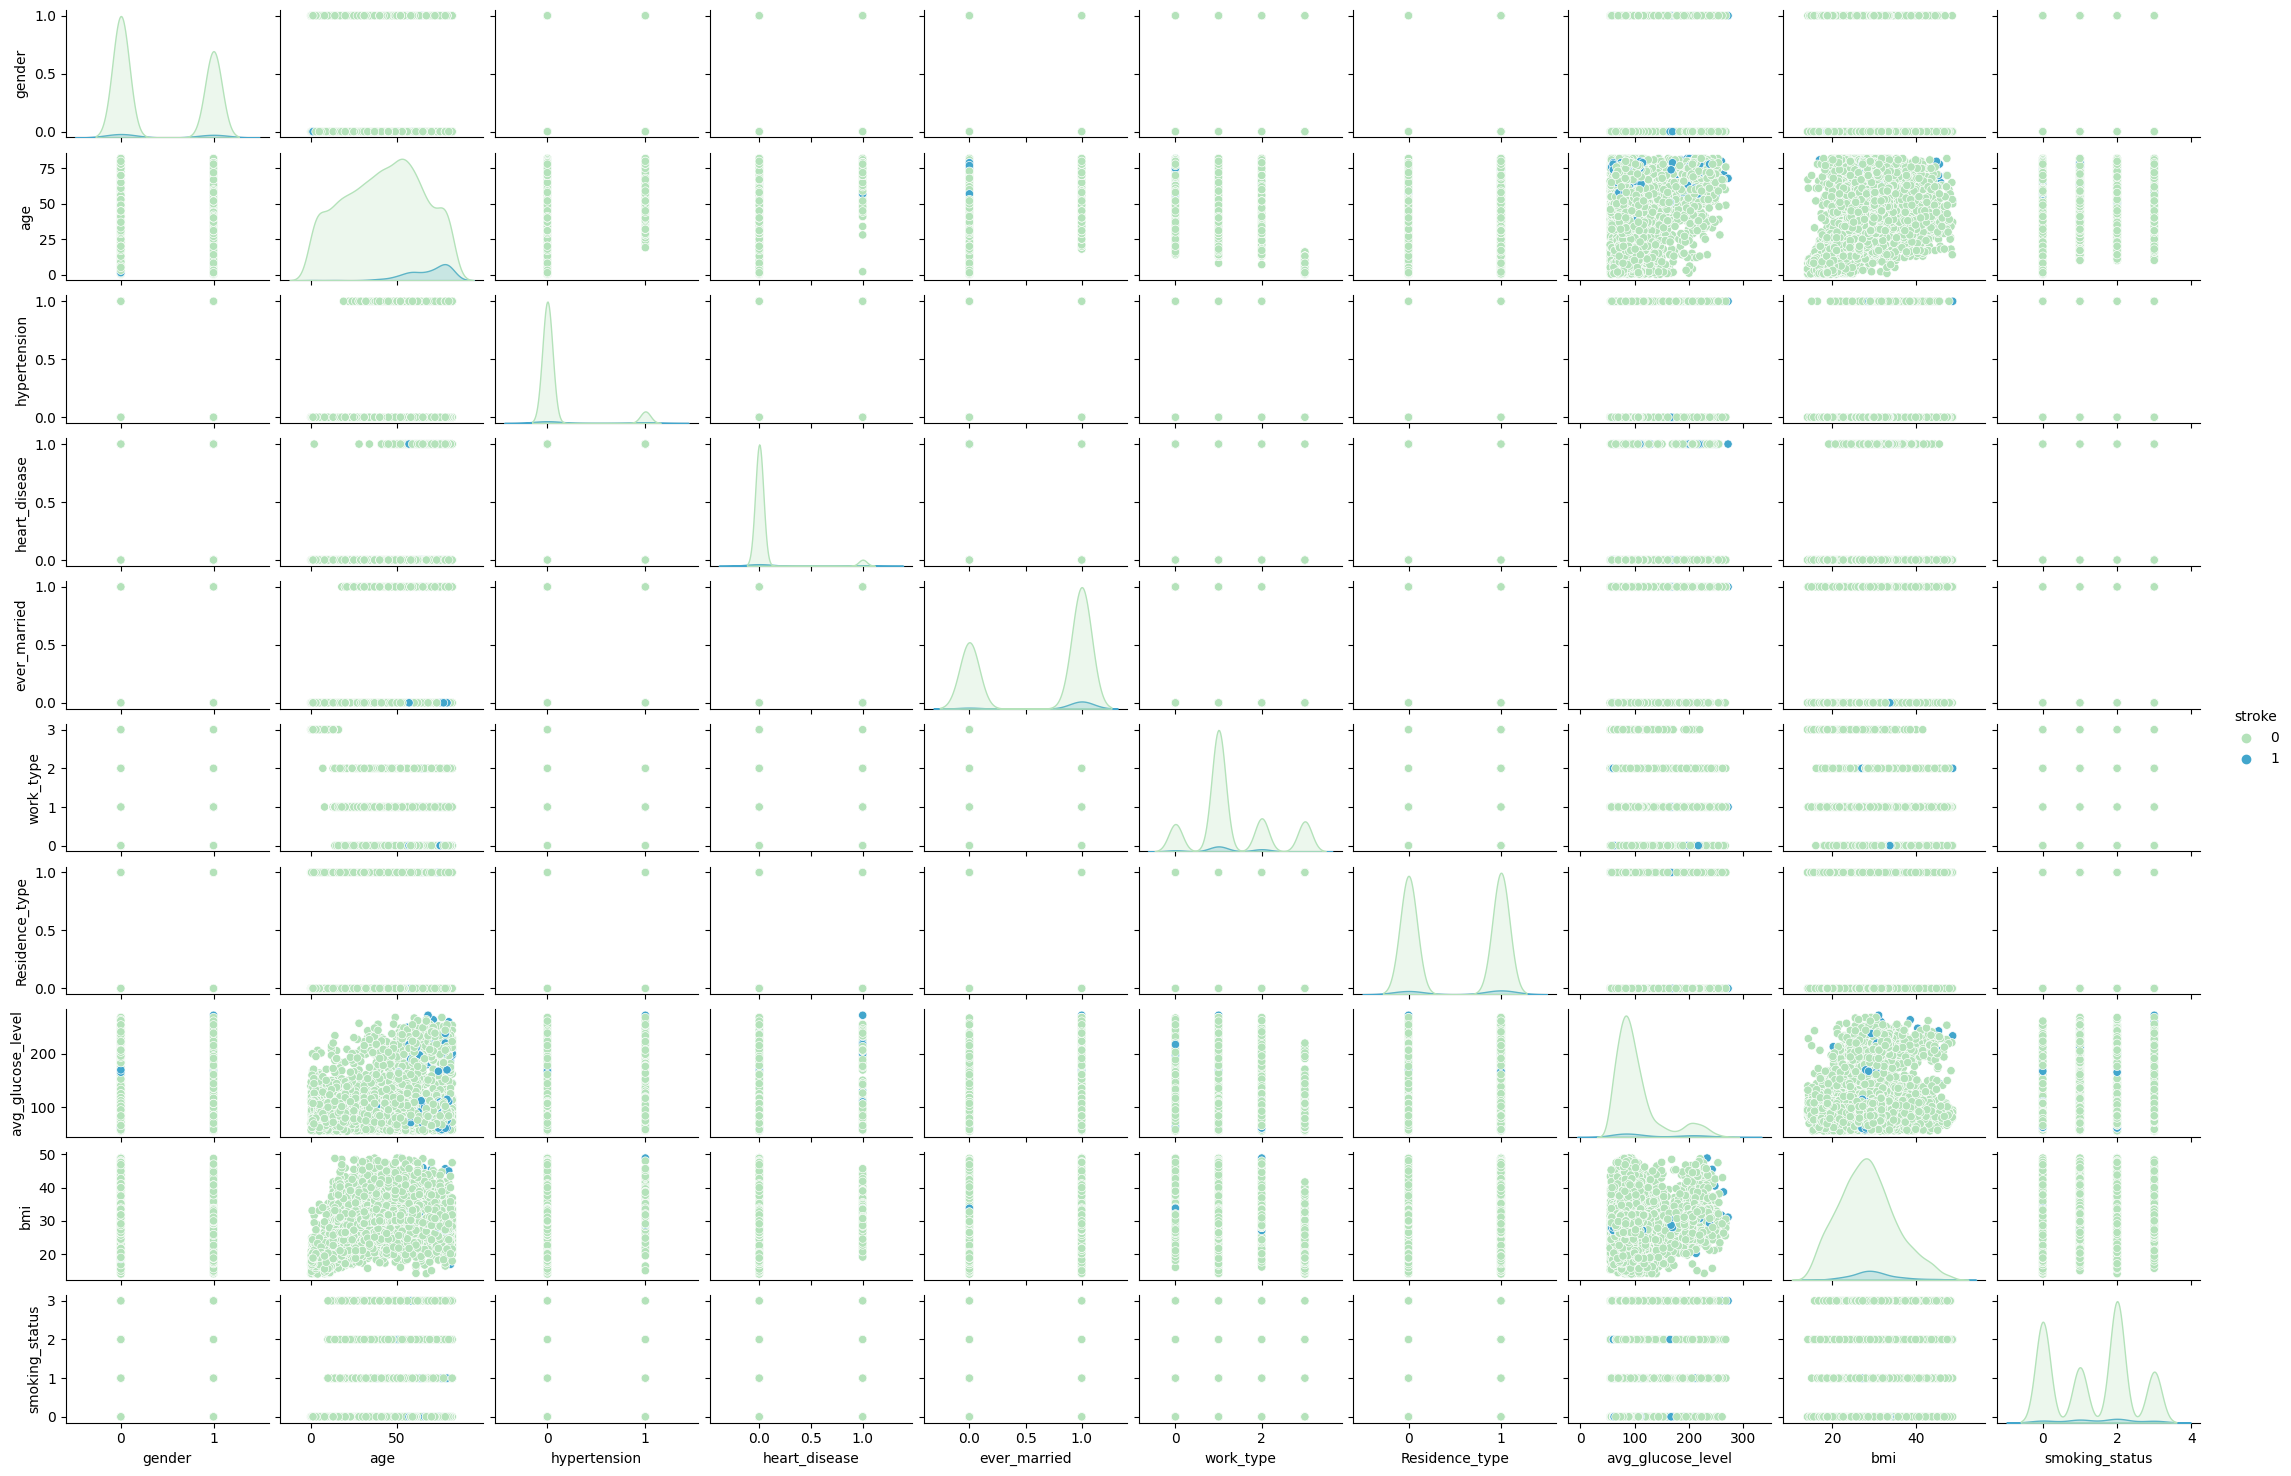

In [ ]:
# Pair plot of the dataset

sns.pairplot(data = brain_stroke_data_temp,hue='stroke',palette="GnBu",height=1.5,aspect=1.5)

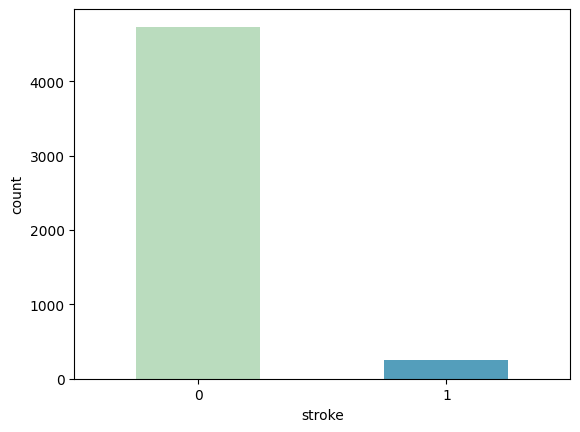

In [ ]:
# Count plot of the 'stroke' label

sns.countplot(x=brain_stroke_data_temp.iloc[:,10],palette="GnBu",width=0.5)
plt.show()

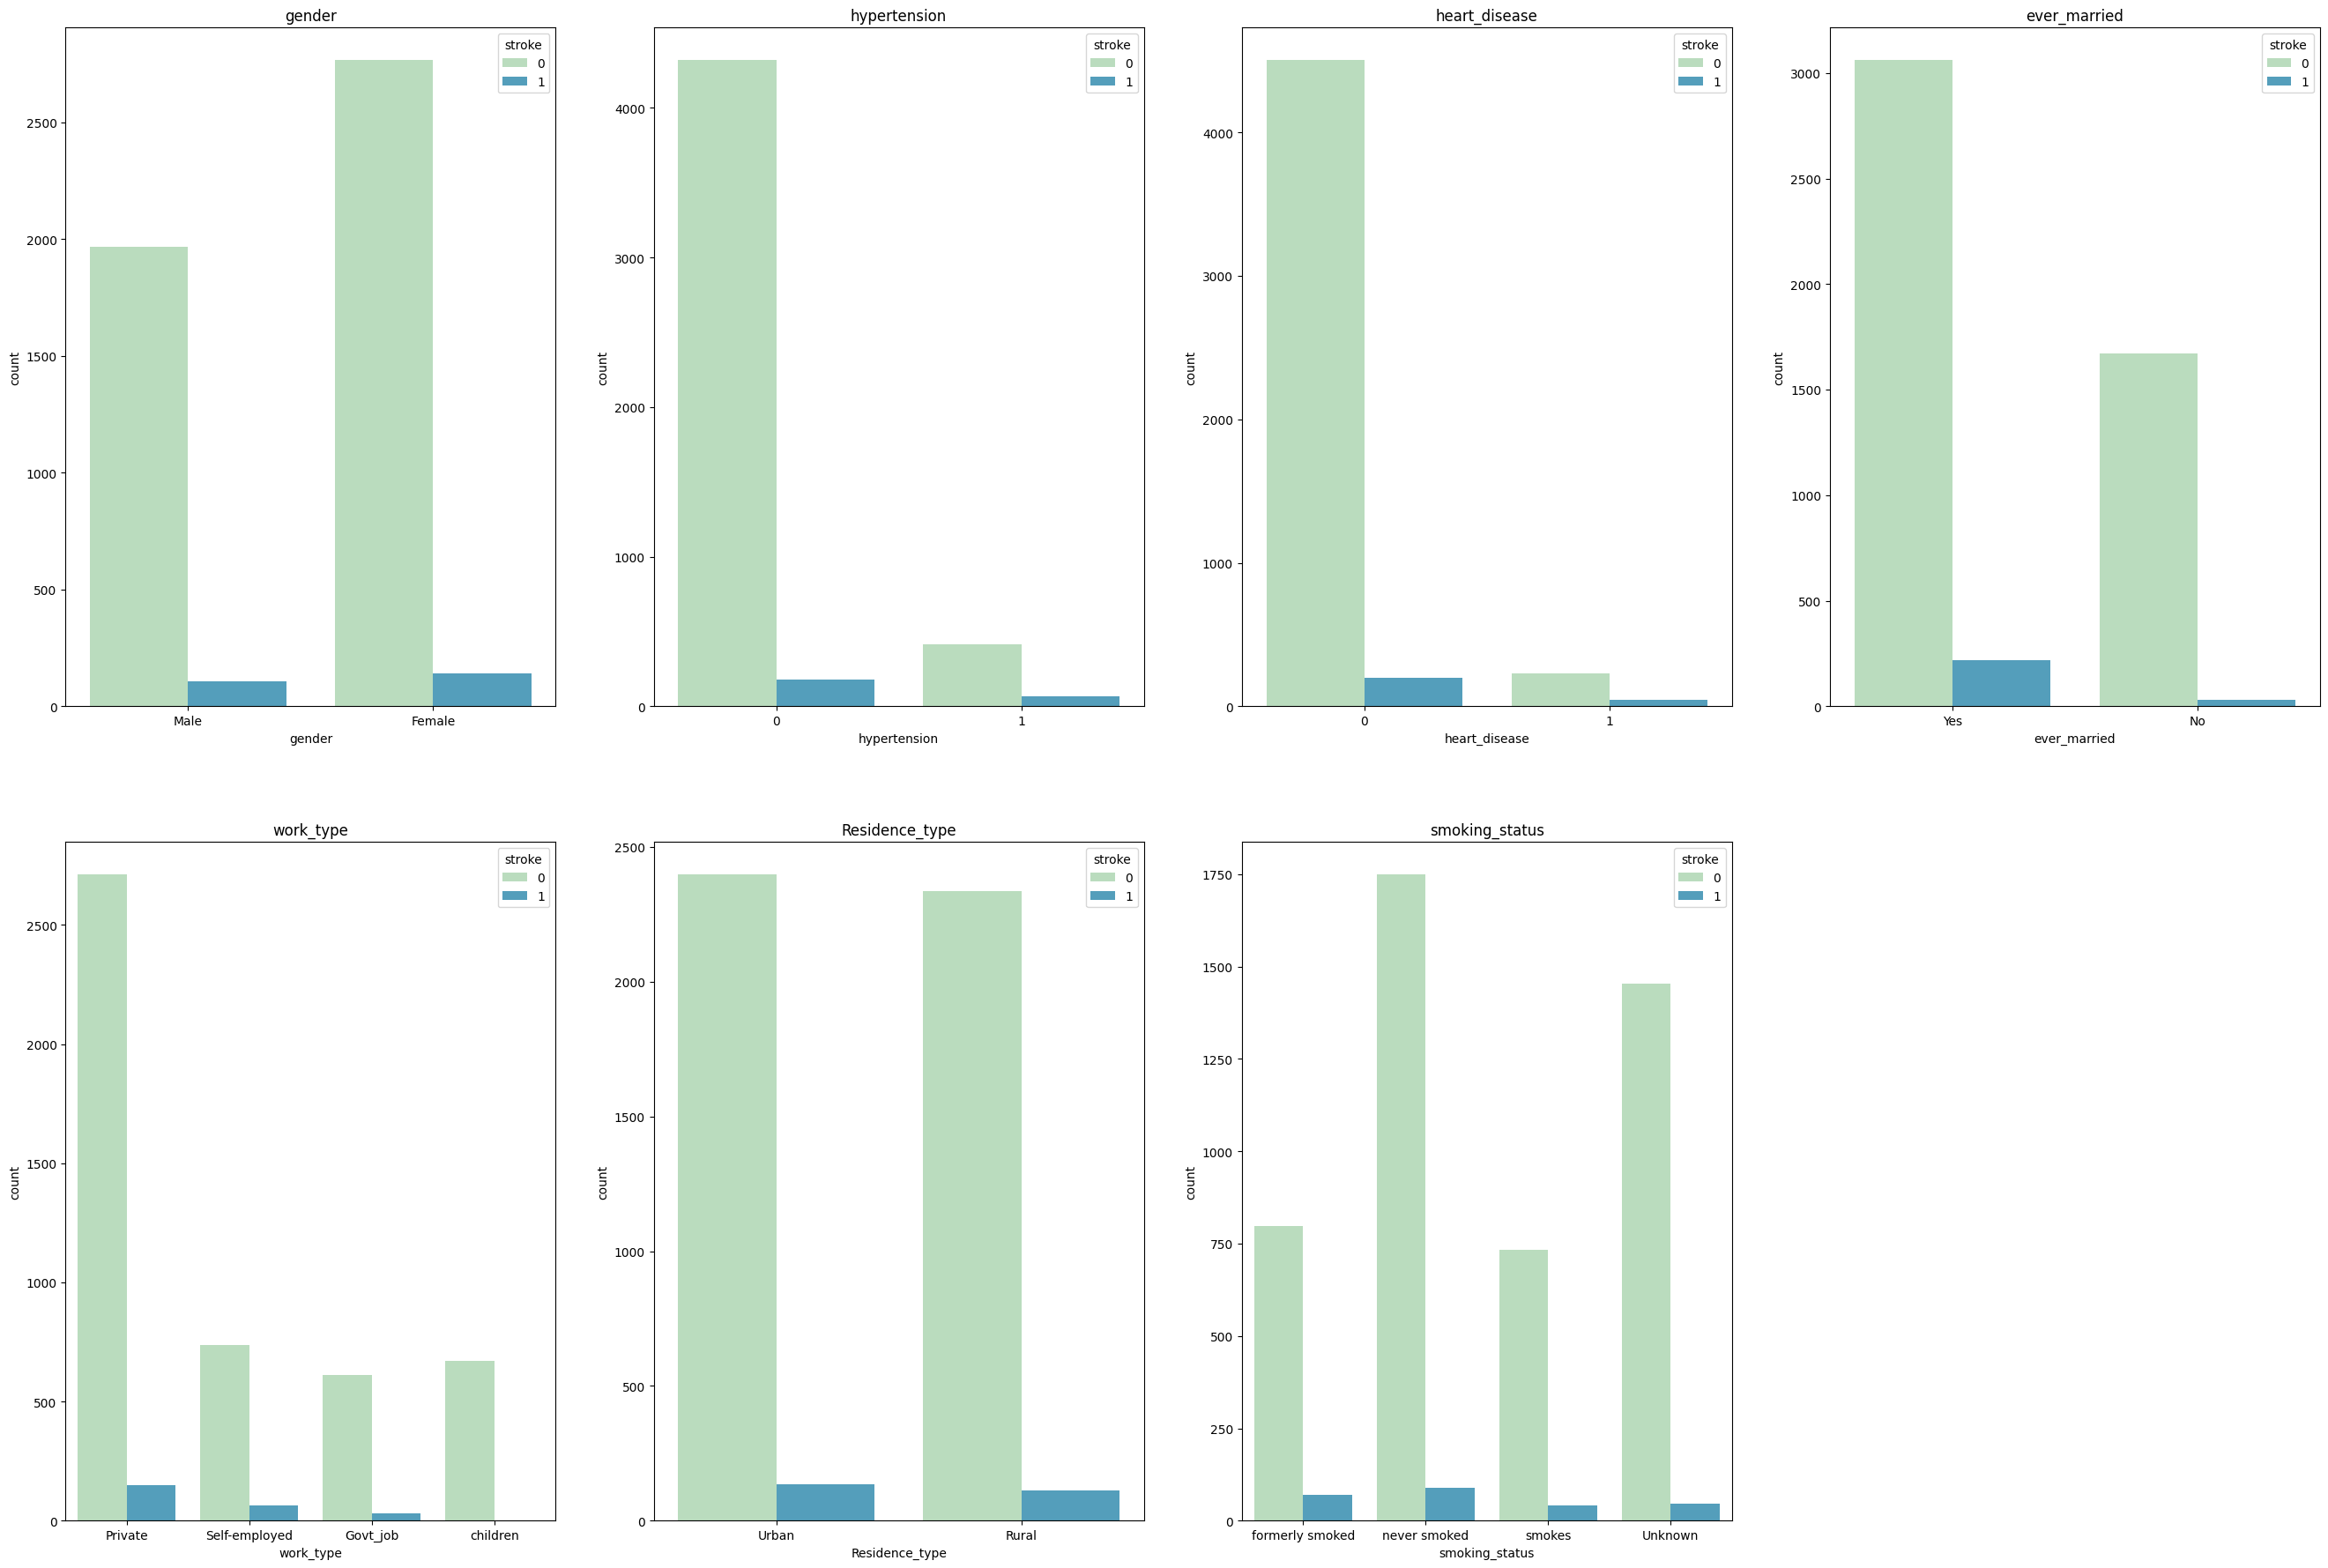

In [ ]:
# Count plots

fig1,a1 = plt.subplots(2,4,figsize=(33,22))
a1x = a1.ravel()

idx=0

attributes = [0,2,3,4,5,6,9]

for i,ax in enumerate(a1x):


  if (idx<=6):

    sns.countplot(ax=ax,x=brain_stroke_data[brain_stroke_data_temp.columns[attributes[i]]],hue=brain_stroke_data['stroke'],palette="GnBu")
    ax.title.set_text('{}'.format(brain_stroke_data_temp.columns[attributes[i]]))


  idx+=1

a1[1,3].set_axis_off()

Text(0.5, 1.0, 'age')

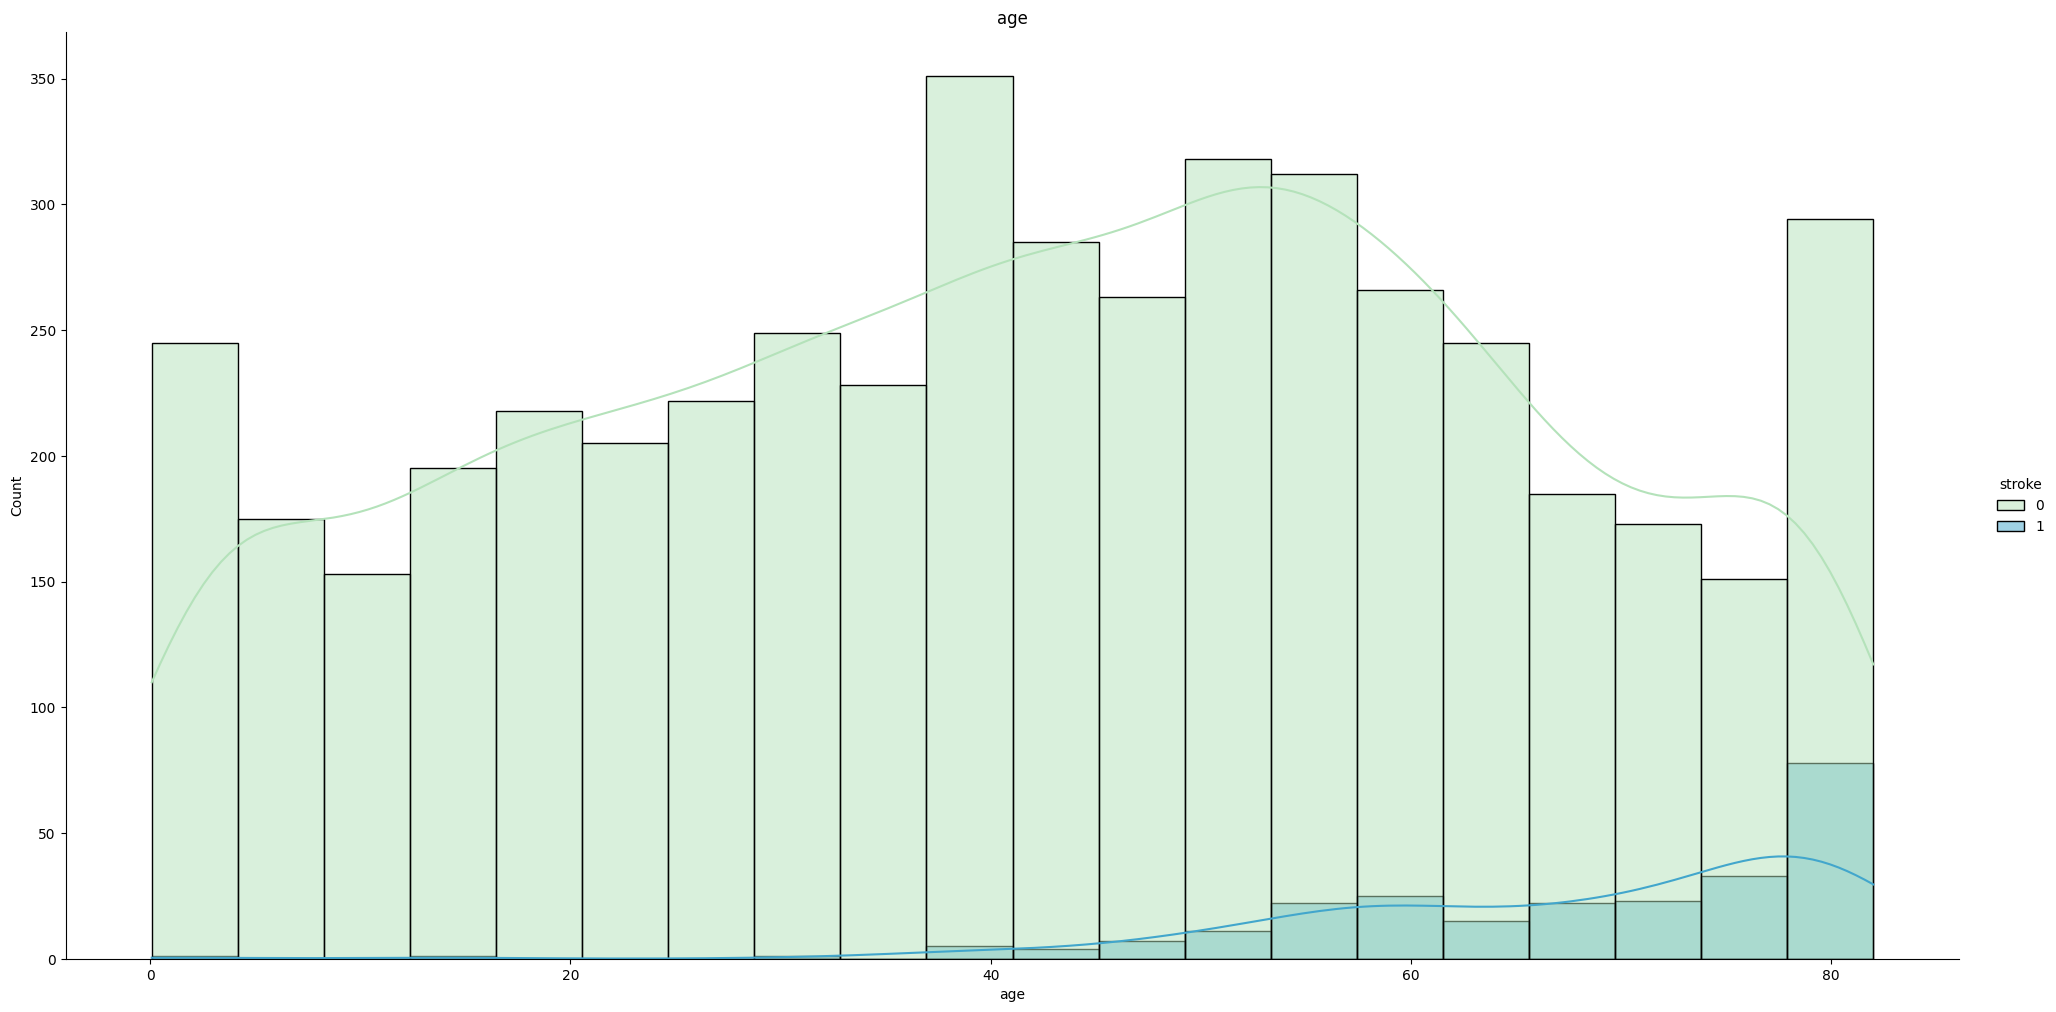

In [ ]:
# Distribution plot of 'age'

sns.displot(x=brain_stroke_data_temp[brain_stroke_data_temp.columns[1]],hue=brain_stroke_data_temp['stroke'],palette='GnBu',kde=True,height=10,aspect=2)
plt.title("age")

Text(0.5, 1.0, 'avg_glucose_level')

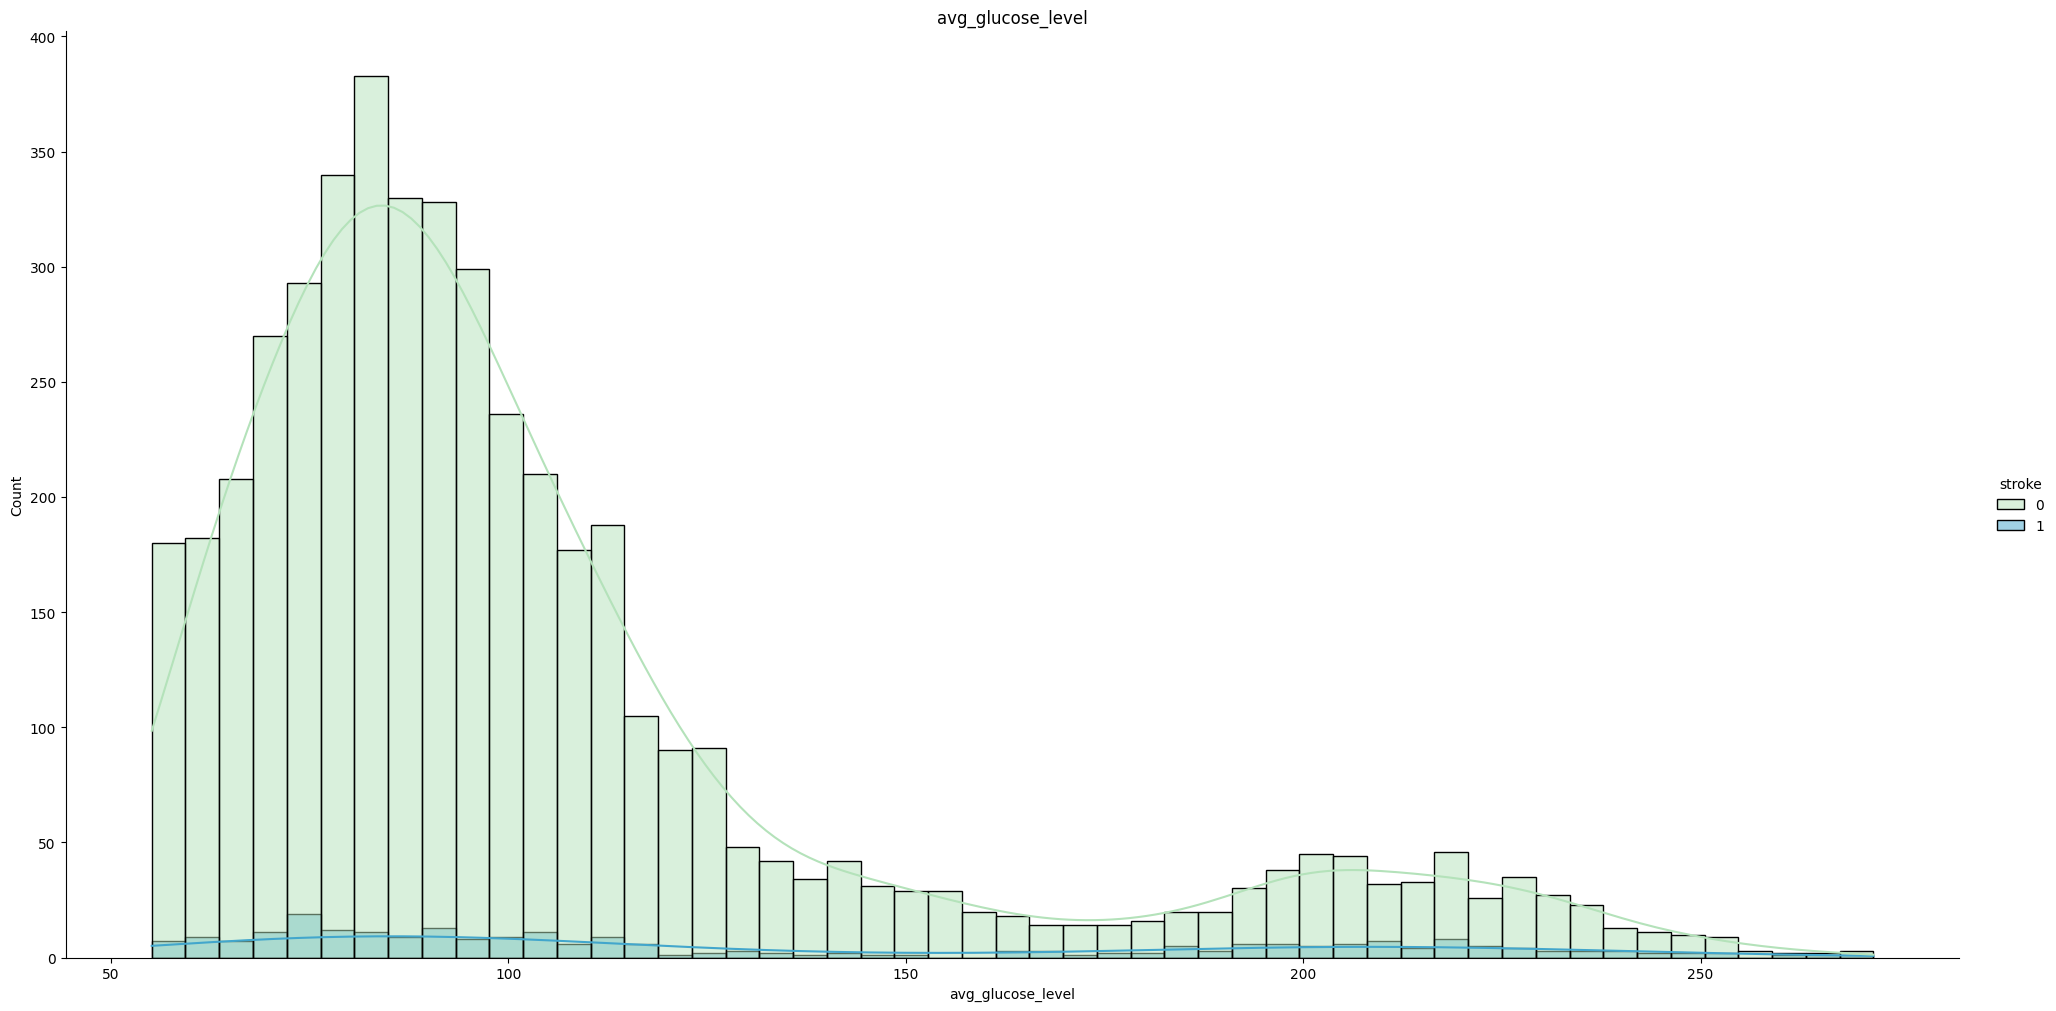

In [ ]:
# Distribution plot of 'avg_glucose_level'

sns.displot(x=brain_stroke_data_temp[brain_stroke_data_temp.columns[7]],hue=brain_stroke_data_temp['stroke'],palette='GnBu',kde=True,height=10,aspect=2)
plt.title('avg_glucose_level')

Text(0.5, 1.0, 'bmi')

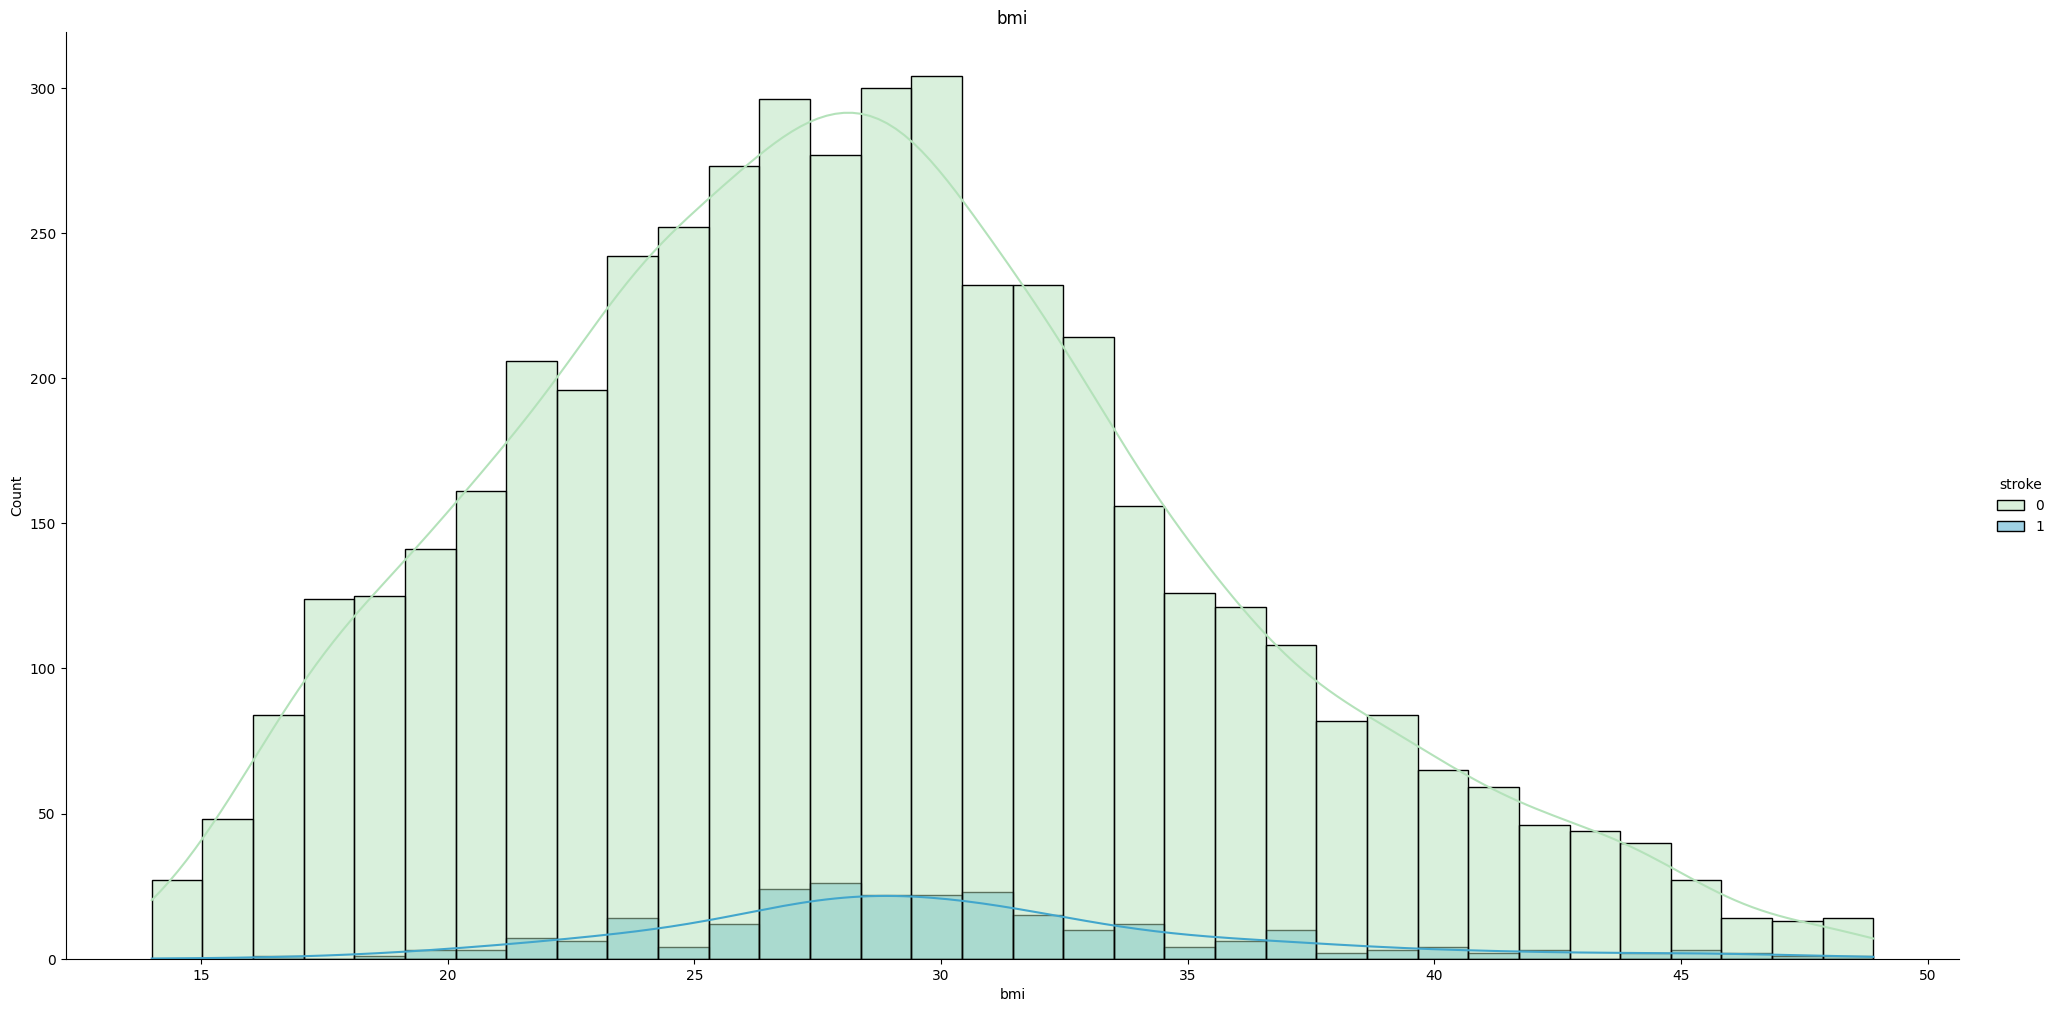

In [ ]:
# Distribution plot of 'bmi'

sns.displot(x=brain_stroke_data_temp[brain_stroke_data_temp.columns[8]],hue=brain_stroke_data_temp['stroke'],palette='GnBu',kde=True,height=10,aspect=2)
plt.title("bmi")

# **3. Preprocessing**

In [ ]:
# Separating attributes and labels

brain_stroke_data_x = brain_stroke_data_temp.iloc[:,:10]
brain_stroke_data_y = brain_stroke_data_temp.iloc[:,10]

brain_stroke_data_x_standardised = (brain_stroke_data_x - brain_stroke_data_x.mean() )/ brain_stroke_data_x.std()

print(brain_stroke_data_x.head())
print()
print(brain_stroke_data_y.head())

   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               1             228.69  36.6               1  
1               0             105.92  32.5               2  
2               1             171.23  34.4               3  
3               0             174.12  24.0               2  
4               1             186.21  29.0               1  

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


**Applying KNN on Original Data ( without SMOTEENN )**

In [ ]:
# Variables that I am using here : brain_stroke_data_x & brain_stroke_data_y

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

brain_stroke_data_x__ = ss.fit_transform(brain_stroke_data_x)

Xtrain,Xtest,ytrain,ytest = train_test_split(brain_stroke_data_x__,brain_stroke_data_y,test_size=0.3,random_state=20,stratify= brain_stroke_data_y)

knn_d= KNeighborsClassifier()
knn_d.fit(Xtrain,ytrain)
knn_pred= knn_d.predict(Xtest)

print(classification_report(ytest,knn_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.12      0.01      0.02        74

    accuracy                           0.95      1495
   macro avg       0.54      0.50      0.50      1495
weighted avg       0.91      0.95      0.93      1495



**Applying LDA on Original Data ( without SMOTEENN )**

In [ ]:
# Variables that I am using here : brain_stroke_data_x & brain_stroke_data_y

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(brain_stroke_data_x__,brain_stroke_data_y)

Xld_train,Xld_test,yld_train,yld_test = train_test_split(X_lda,brain_stroke_data_y,stratify=brain_stroke_data_y,test_size=0.3,random_state=3)

lr1= LogisticRegression()
lr1.fit(Xld_train,yld_train)
lr1_pred= lr1.predict(Xld_test)

print(classification_report(yld_test,lr1_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1421
           1       0.50      0.01      0.03        74

    accuracy                           0.95      1495
   macro avg       0.73      0.51      0.50      1495
weighted avg       0.93      0.95      0.93      1495



**Balancing Class Weights**

In [ ]:
# Balancing Class Weights

log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(Xtrain,ytrain)
ypred = log_reg.predict(Xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1421
           1       0.14      0.85      0.23        74

    accuracy                           0.72      1495
   macro avg       0.56      0.78      0.53      1495
weighted avg       0.95      0.72      0.80      1495



In [ ]:
# Stratified Split

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

for train_idx,test_idx in sss.split(brain_stroke_data_x_standardised,brain_stroke_data_y):

  brain_stroke_data_train_x = brain_stroke_data_x_standardised.iloc[train_idx,:]
  brain_stroke_data_train_x_ = brain_stroke_data_x.iloc[train_idx,:]
  brain_stroke_data_train_y = brain_stroke_data_y.iloc[train_idx]
  brain_stroke_data_test_x = brain_stroke_data_x_standardised.iloc[test_idx,:]
  brain_stroke_data_test_x_ = brain_stroke_data_x.iloc[test_idx,:]
  brain_stroke_data_test_y = brain_stroke_data_y.iloc[test_idx]

In [ ]:
# Resampling using the SMOTEENN technique

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler

resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'),random_state=42)
brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote = resample.fit_resample(brain_stroke_data_train_x,brain_stroke_data_train_y)
brain_stroke_data_temp_train_smote = brain_stroke_data_train_x_smote.join(brain_stroke_data_train_y_smote)

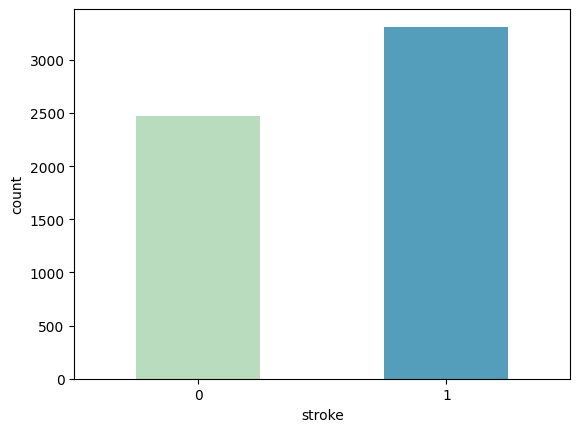

In [ ]:
# Count plot of the 'stroke' label

resample_ = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'),random_state=42)
brain_stroke_data_train_x_smote_,brain_stroke_data_train_y_smote_ = resample_.fit_resample(brain_stroke_data_train_x_,brain_stroke_data_train_y)
brain_stroke_data_temp_train_smote_ = brain_stroke_data_train_x_smote_.join(brain_stroke_data_train_y_smote_)

sns.countplot(x=brain_stroke_data_train_y_smote_,palette="GnBu",width=0.5)
plt.show()

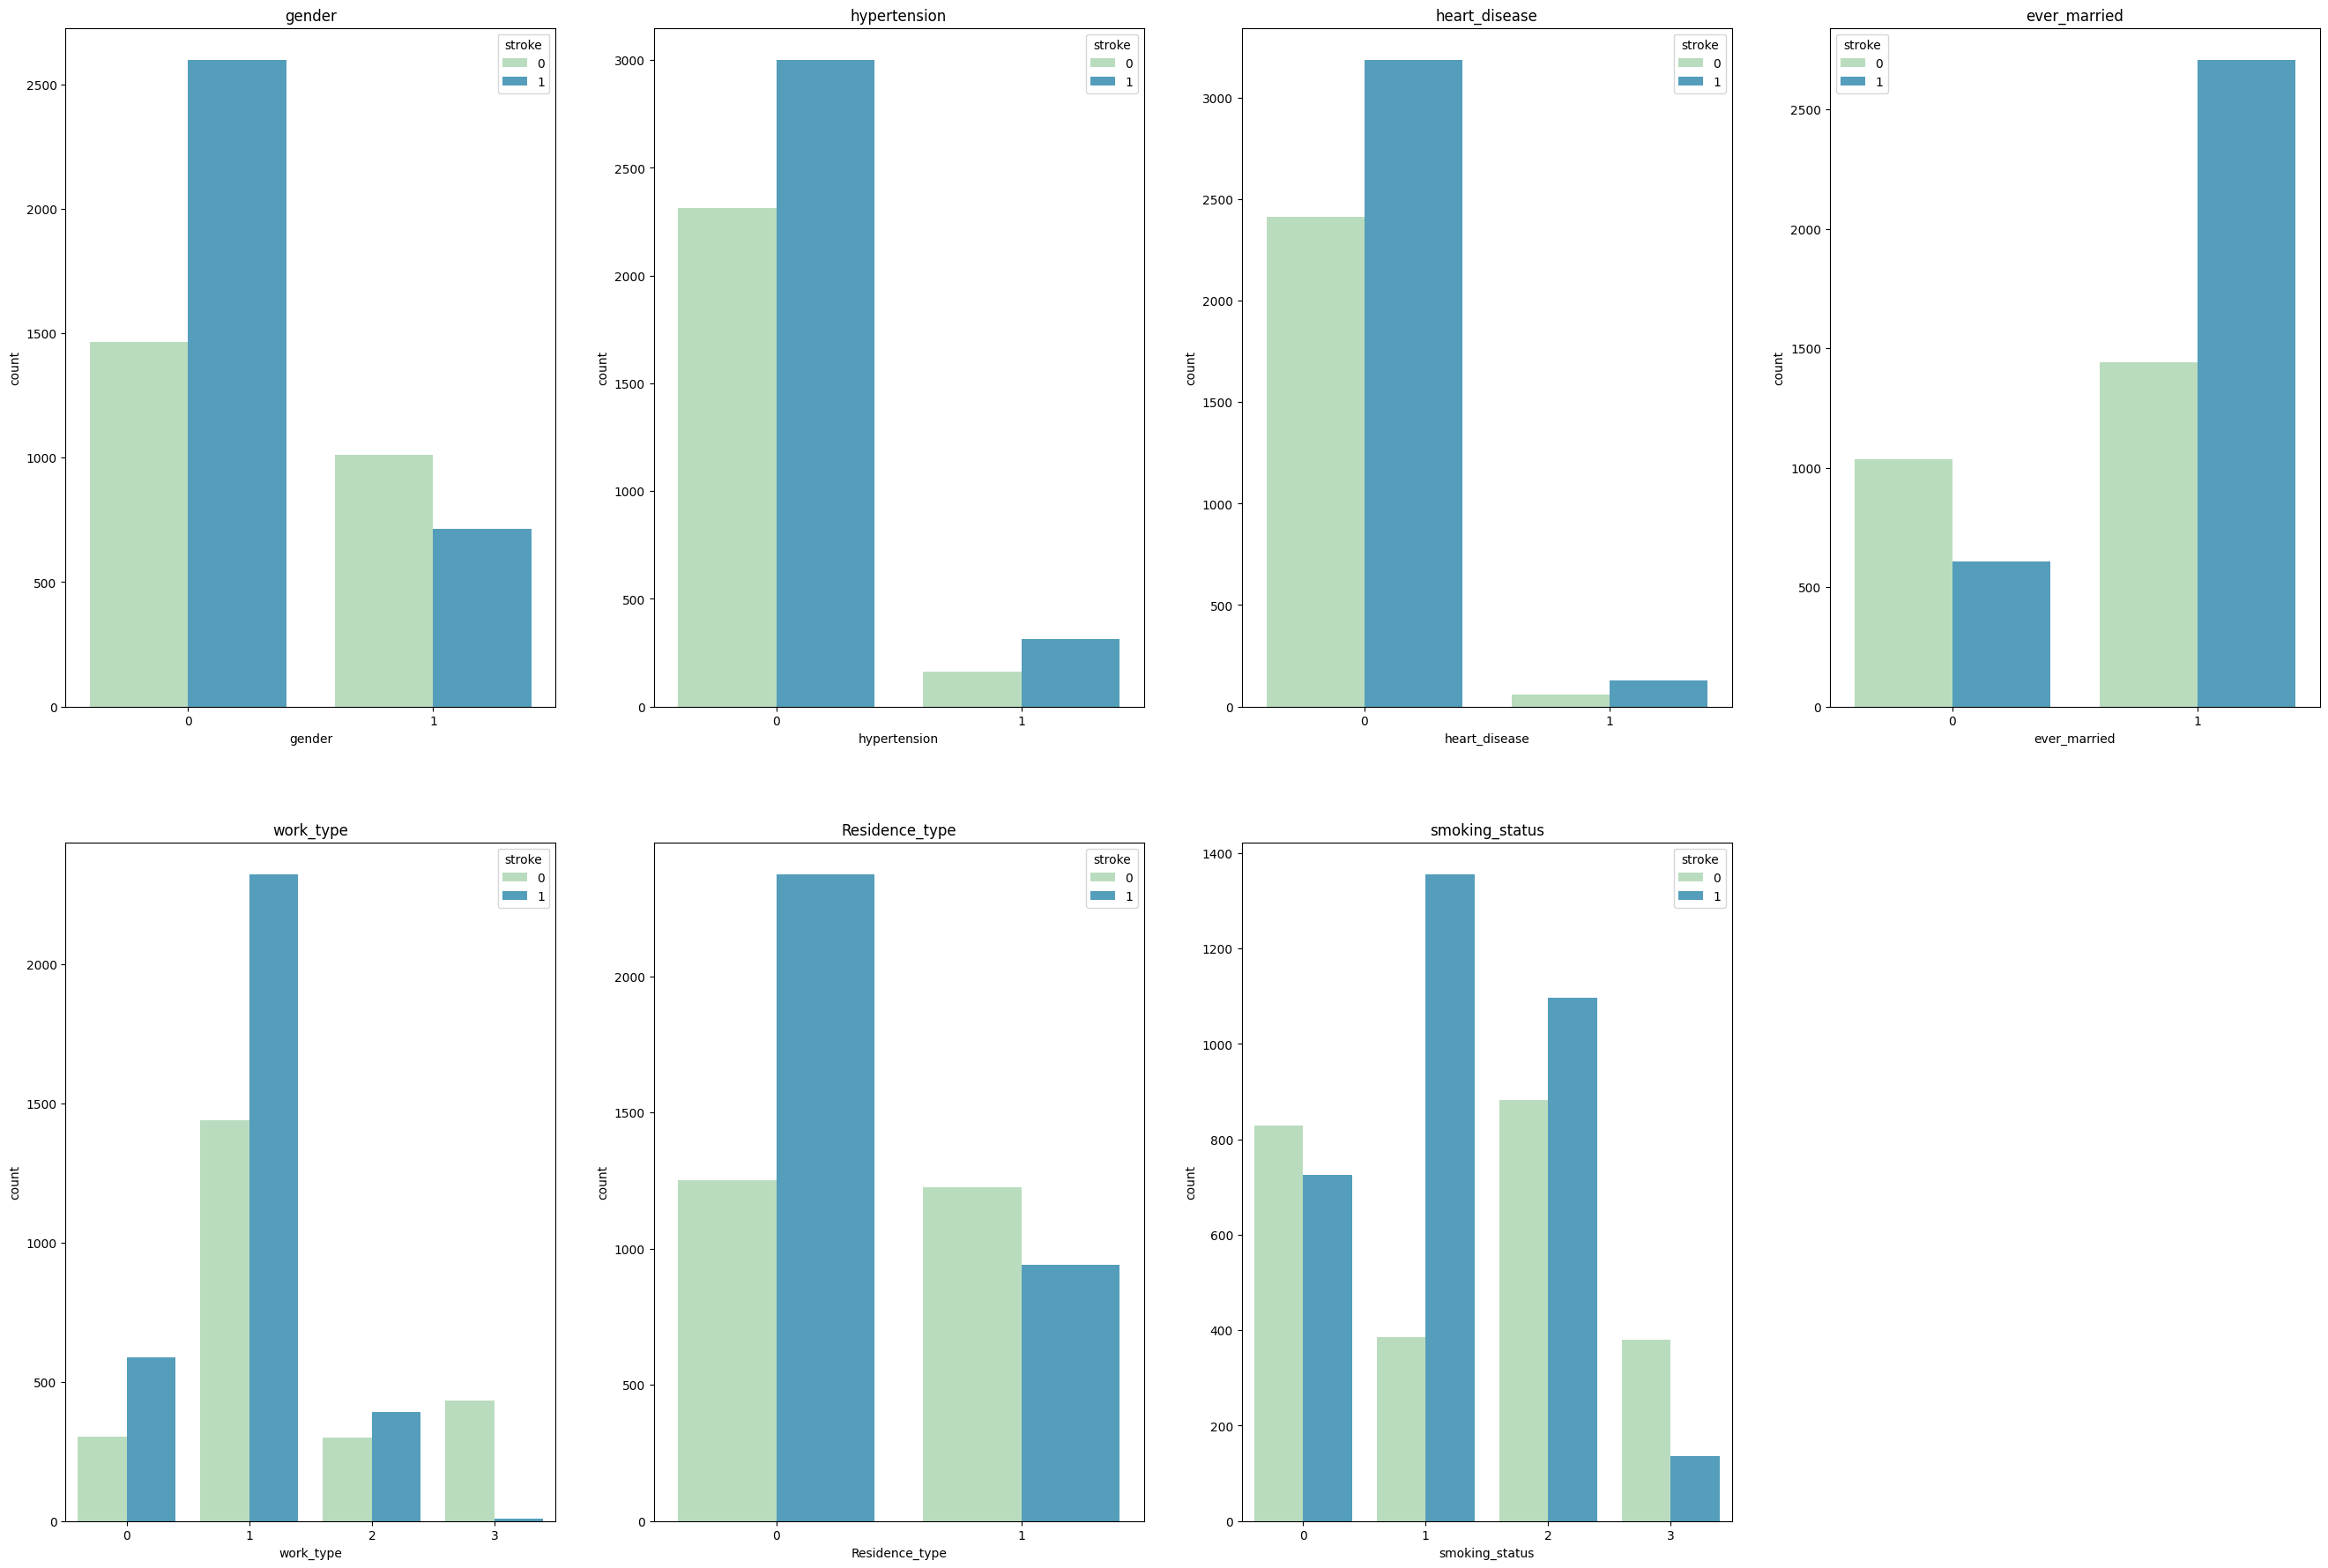

In [ ]:
# Count plots

fig1,a1 = plt.subplots(2,4,figsize=(33,22))
a1x = a1.ravel()

idx=0

attributes = [0,2,3,4,5,6,9]

for i,ax in enumerate(a1x):


  if (idx<=6):

    sns.countplot(ax=ax,x=brain_stroke_data_temp_train_smote_[brain_stroke_data_temp_train_smote_.columns[attributes[i]]],hue=brain_stroke_data_temp_train_smote_['stroke'],palette="GnBu")
    ax.title.set_text('{}'.format(brain_stroke_data_temp_train_smote_.columns[attributes[i]]))


  idx+=1

a1[1,3].set_axis_off()

Text(0.5, 1.0, 'age')

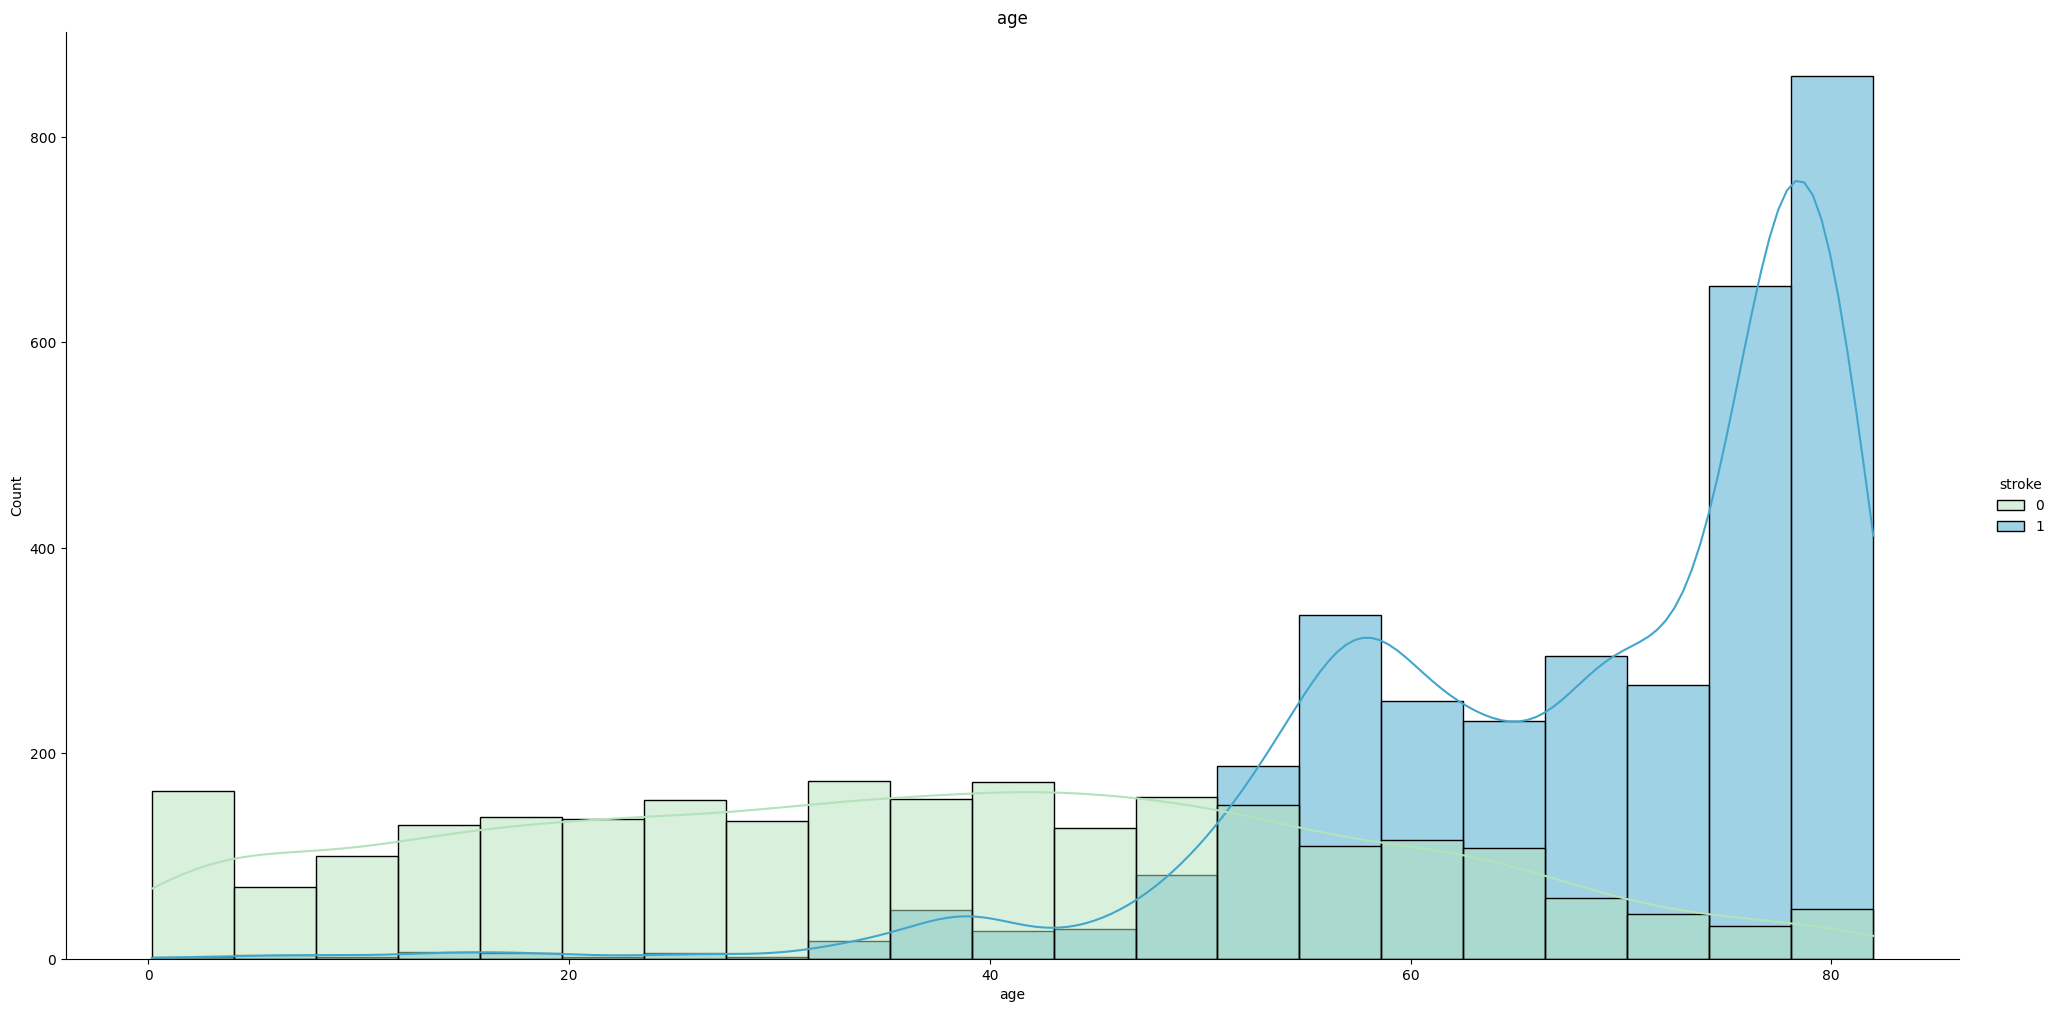

In [ ]:
# Distribution plot of 'age'

sns.displot(x=brain_stroke_data_temp_train_smote_[brain_stroke_data_temp_train_smote_.columns[1]],hue=brain_stroke_data_temp_train_smote_['stroke'],palette='GnBu',kde=True,height=10,aspect=2)
plt.title("age")

Text(0.5, 1.0, 'avg_glucose_level')

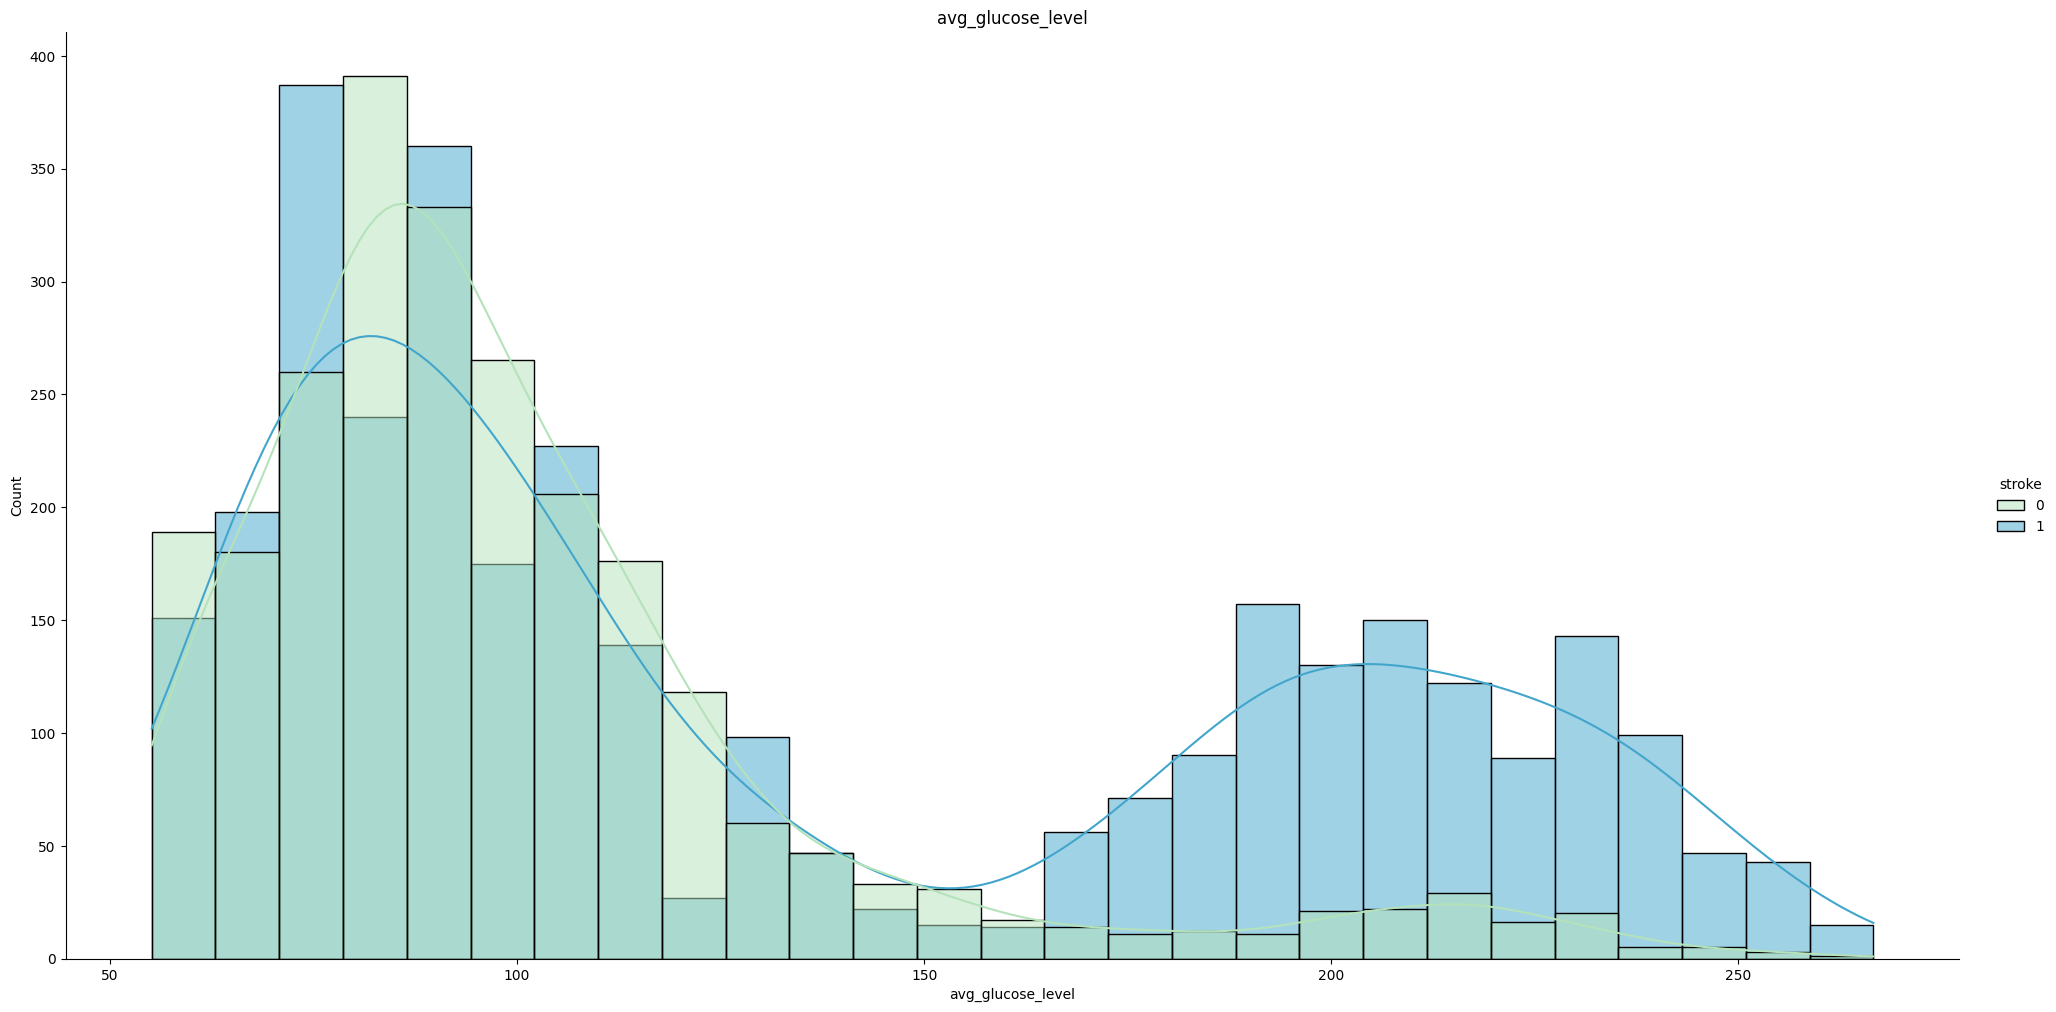

In [ ]:
# Distribution plot of 'avg_glucose_level'

sns.displot(x=brain_stroke_data_temp_train_smote_[brain_stroke_data_temp_train_smote_.columns[7]],hue=brain_stroke_data_temp_train_smote_['stroke'],palette='GnBu',kde=True,height=10,aspect=2)
plt.title('avg_glucose_level')

Text(0.5, 1.0, 'bmi')

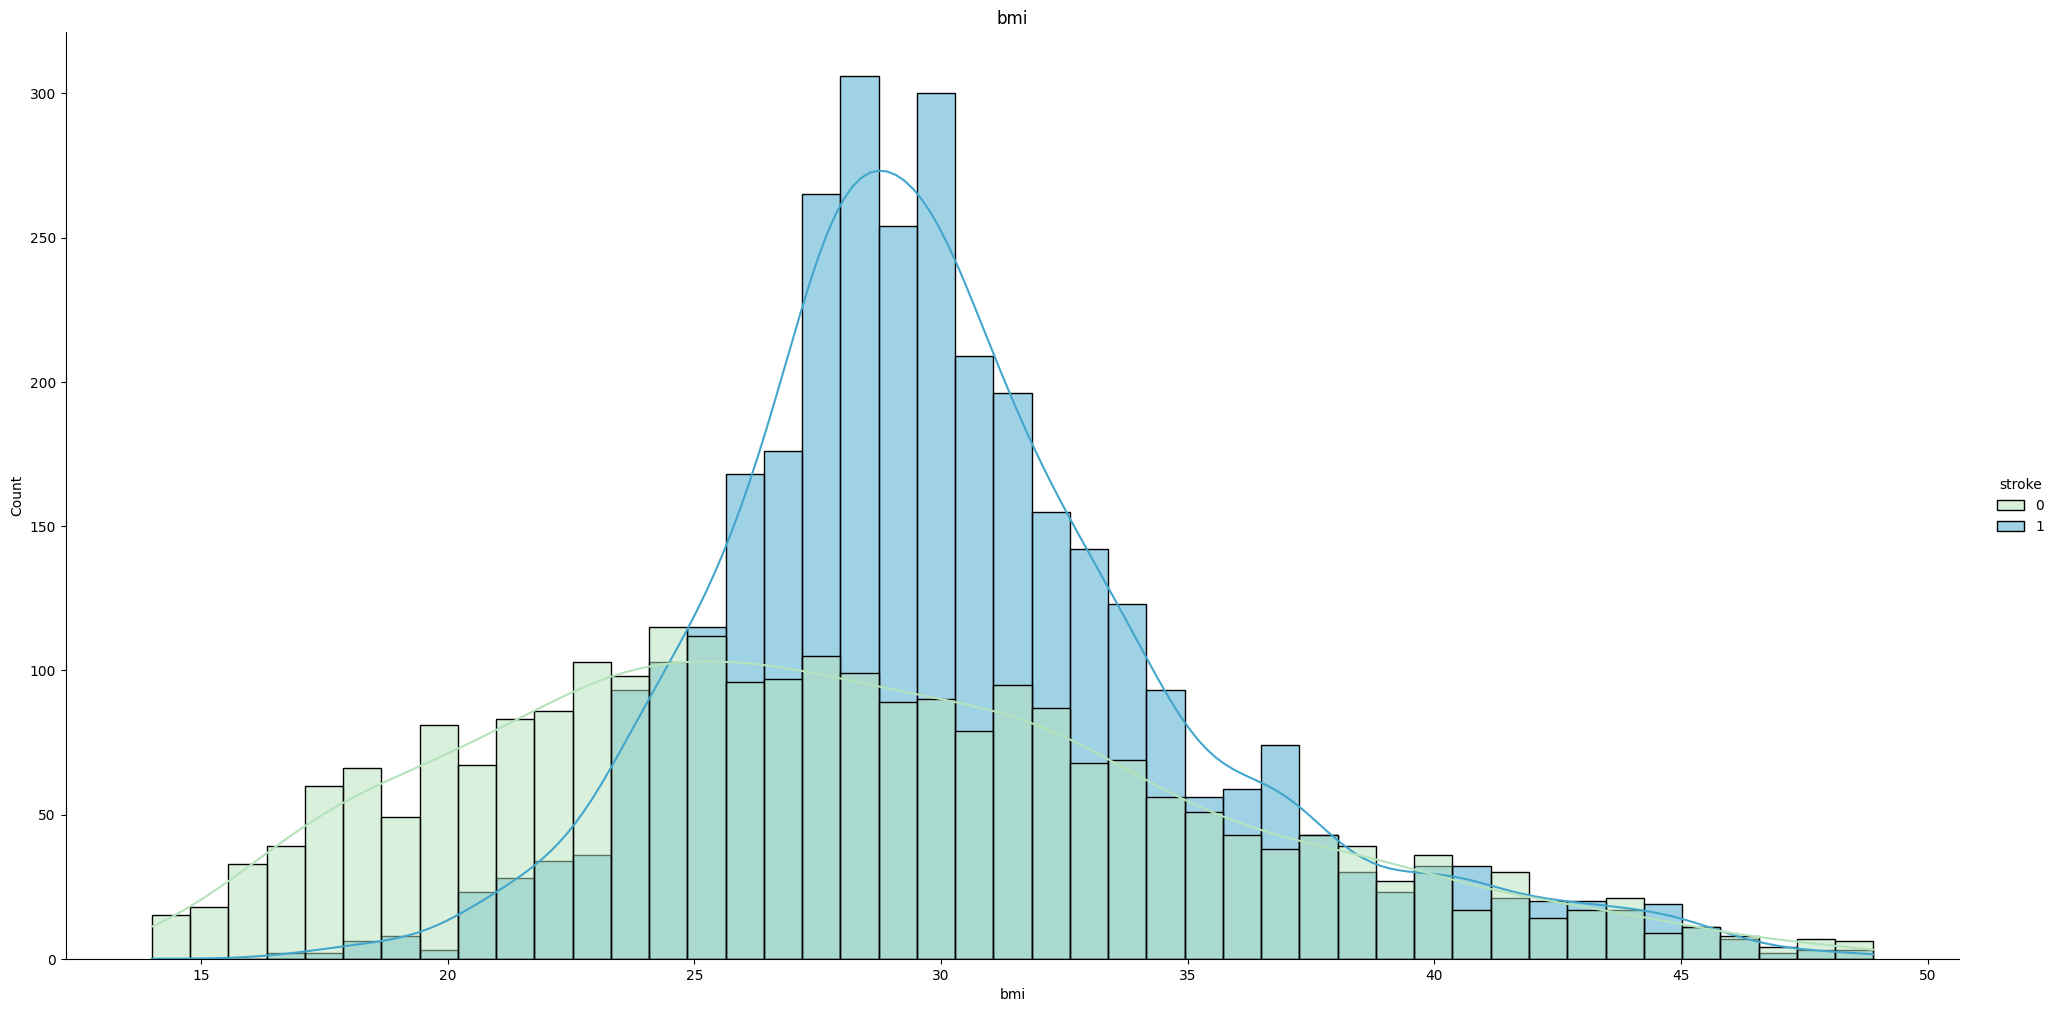

In [ ]:
# Distribution plot of 'bmi'

sns.displot(x=brain_stroke_data_temp_train_smote_[brain_stroke_data_temp_train_smote_.columns[8]],hue=brain_stroke_data_temp_train_smote_['stroke'],palette='GnBu',kde=True,height=10,aspect=2)
plt.title("bmi")

# **4. Single Classifiers**

# **4.1. Decision Tree Classifier**

In [ ]:
# Decision Tree Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt1_param_grid = {'max_features': ['sqrt', 'log2'],
                  'min_samples_leaf': [1,10,50],
                  'min_samples_split': [2,10,50,100],
                  'max_depth' : [5,10,50,100],
                  'criterion' :['gini', 'entropy']
                 }

dt1_grid = GridSearchCV(DecisionTreeClassifier(),dt1_param_grid,refit=True,verbose=1,cv=5,scoring='f1')

dt1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 50, 100],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 10, 50, 100]},
             scoring='f1', verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

dt1_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
# Decision Tree Classifier

dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=100,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=27)
dt1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
dt1_pred = dt1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

dt1_report = classification_report(brain_stroke_data_test_y,dt1_pred)

print(dt1_report)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1421
           1       0.13      0.38      0.19        74

    accuracy                           0.84      1495
   macro avg       0.55      0.62      0.55      1495
weighted avg       0.92      0.84      0.88      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

dt1_report_dict =  classification_report(brain_stroke_data_test_y,dt1_pred,output_dict=True)

dt1_accuracy = dt1_report_dict['accuracy']
dt1_precision = dt1_report_dict['1']['precision']
dt1_recall = dt1_report_dict['1']['recall']
dt1_f1 = dt1_report_dict['1']['f1-score']

print("Accuracy             : ",dt1_accuracy)
print()
print("Precision ( Stroke ) : ",dt1_precision)
print("Recall    ( Stroke ) : ",dt1_recall)
print("F1-Score  ( Stroke ) : ",dt1_f1)

Accuracy             :  0.842809364548495

Precision ( Stroke ) :  0.12903225806451613
Recall    ( Stroke ) :  0.3783783783783784
F1-Score  ( Stroke ) :  0.1924398625429553


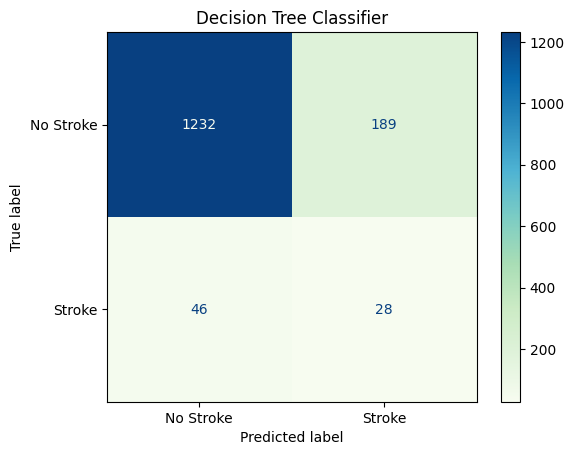

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=dt1
               ,title="Decision Tree Classifier")

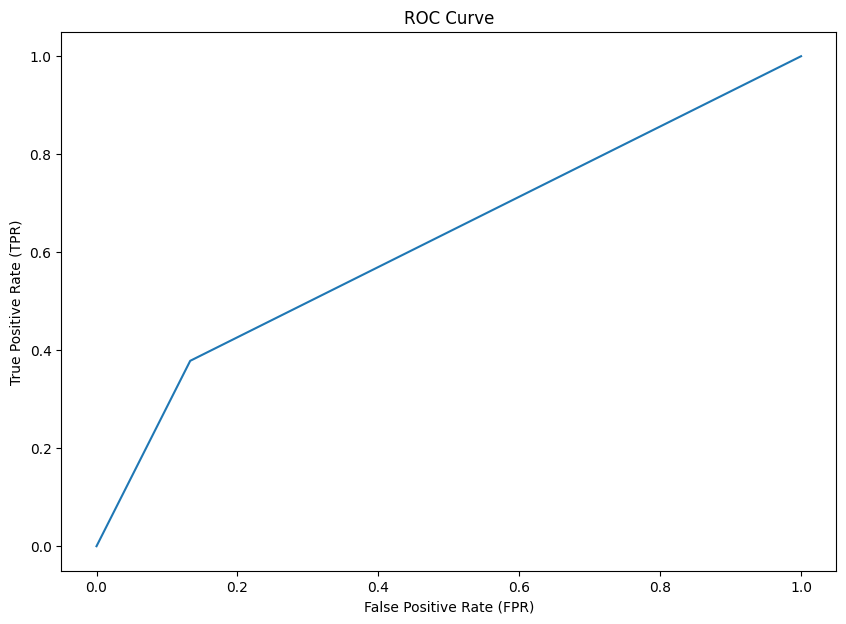

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
dt1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,dt1)

# **4.2. Naive Bayes Classifier**

In [ ]:
# Naive Bayes Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

nb1_param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

nb1_grid = GridSearchCV(GaussianNB(),nb1_param_grid,refit=True,verbose=1,cv=5,scoring="f1")

nb1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1', verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

nb1_grid.best_params_

{'var_smoothing': 0.001873817422860383}

In [ ]:
# Naive Bayes Classifier

nb1 = GaussianNB(var_smoothing=0.001873817422860383)
nb1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
nb1_pred = nb1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

nb1_report = classification_report(brain_stroke_data_test_y,nb1_pred)

print(nb1_report)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1421
           1       0.13      0.78      0.22        74

    accuracy                           0.73      1495
   macro avg       0.56      0.76      0.53      1495
weighted avg       0.94      0.73      0.81      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

nb1_report_dict =  classification_report(brain_stroke_data_test_y,nb1_pred,output_dict=True)

nb1_accuracy = nb1_report_dict['accuracy']
nb1_precision = nb1_report_dict['1']['precision']
nb1_recall = nb1_report_dict['1']['recall']
nb1_f1 = nb1_report_dict['1']['f1-score']

print("Accuracy             : ",nb1_accuracy)
print()
print("Precision ( Stroke ) : ",nb1_precision)
print("Recall    ( Stroke ) : ",nb1_recall)
print("F1-Score  ( Stroke ) : ",nb1_f1)

Accuracy             :  0.7317725752508362

Precision ( Stroke ) :  0.1309255079006772
Recall    ( Stroke ) :  0.7837837837837838
F1-Score  ( Stroke ) :  0.2243713733075435


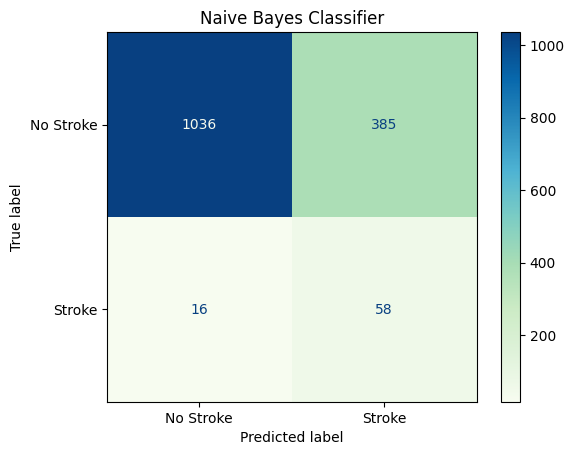

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=nb1
               ,title="Naive Bayes Classifier")

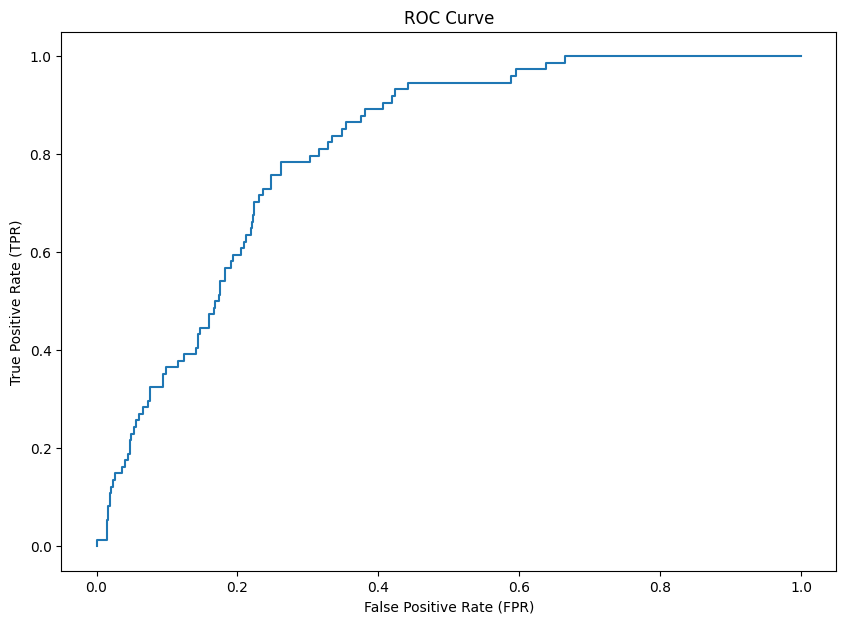

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
nb1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,nb1)

# **4.3. SVM Classifier**

In [ ]:
# SVM Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc1_param_grid = {'C': [10,50,100],
                   'gamma': [1,0.1],
                   'kernel': ['rbf']}

svc1_grid = GridSearchCV(SVC(),svc1_param_grid,refit=True,verbose=1,cv=5,scoring='f1')

svc1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 50, 100], 'gamma': [1, 0.1],
                         'kernel': ['rbf']},
             scoring='f1', verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

svc1_grid.best_params_

{'C': 50, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
# SVM Classifier

svc1 = SVC(C=50,gamma=1,kernel='rbf',probability=True)
svc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
svc1_pred = svc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

svc1_report = classification_report(brain_stroke_data_test_y,svc1_pred)

print(svc1_report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1421
           1       0.12      0.30      0.17        74

    accuracy                           0.85      1495
   macro avg       0.54      0.59      0.54      1495
weighted avg       0.92      0.85      0.88      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

svc1_report_dict =  classification_report(brain_stroke_data_test_y,svc1_pred,output_dict=True)

svc1_accuracy = svc1_report_dict['accuracy']
svc1_precision = svc1_report_dict['1']['precision']
svc1_recall = svc1_report_dict['1']['recall']
svc1_f1 = svc1_report_dict['1']['f1-score']

print("Accuracy             : ",svc1_accuracy)
print()
print("Precision ( Stroke ) : ",svc1_precision)
print("Recall    ( Stroke ) : ",svc1_recall)
print("F1-Score  ( Stroke ) : ",svc1_f1)

Accuracy             :  0.8548494983277592

Precision ( Stroke ) :  0.11764705882352941
Recall    ( Stroke ) :  0.2972972972972973
F1-Score  ( Stroke ) :  0.16858237547892724


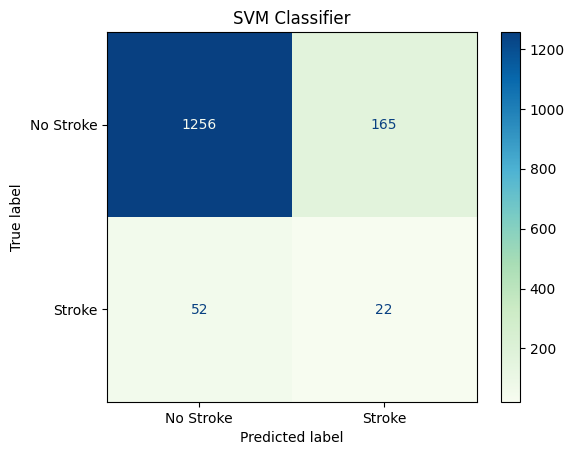

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=svc1
               ,title="SVM Classifier")

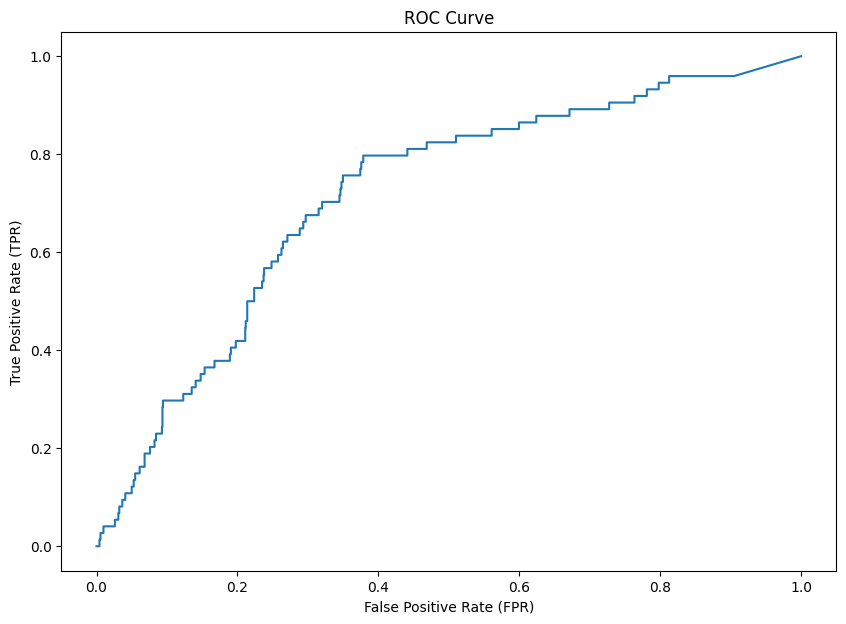

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
svc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,svc1)

# **4.4. KNN Classifier**

In [ ]:
# KNN Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn1_param_grid = { 'n_neighbors' : [2,3,4,5,7,8,11,15],
                    'weights' : ['uniform','distance'],
                    'metric' : ['minkowski','euclidean','manhattan']}

knn1_grid = GridSearchCV(KNeighborsClassifier(),knn1_param_grid,refit=True,verbose=1,cv=5,scoring='f1')

knn1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 4, 5, 7, 8, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

knn1_grid.best_params_

{'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
# KNN Classifier

knn1 = KNeighborsClassifier(metric='minkowski',n_neighbors=2,weights='distance')
knn1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
knn1_pred = knn1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

knn1_report = classification_report(brain_stroke_data_test_y,knn1_pred)

print(knn1_report)

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1421
           1       0.12      0.42      0.18        74

    accuracy                           0.81      1495
   macro avg       0.54      0.63      0.54      1495
weighted avg       0.92      0.81      0.86      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

knn1_report_dict =  classification_report(brain_stroke_data_test_y,knn1_pred,output_dict=True)

knn1_accuracy = knn1_report_dict['accuracy']
knn1_precision = knn1_report_dict['1']['precision']
knn1_recall = knn1_report_dict['1']['recall']
knn1_f1 = knn1_report_dict['1']['f1-score']

print("Accuracy             : ",knn1_accuracy)
print()
print("Precision ( Stroke ) : ",knn1_precision)
print("Recall    ( Stroke ) : ",knn1_recall)
print("F1-Score  ( Stroke ) : ",knn1_f1)

Accuracy             :  0.8133779264214047

Precision ( Stroke ) :  0.11610486891385768
Recall    ( Stroke ) :  0.4189189189189189
F1-Score  ( Stroke ) :  0.18181818181818182


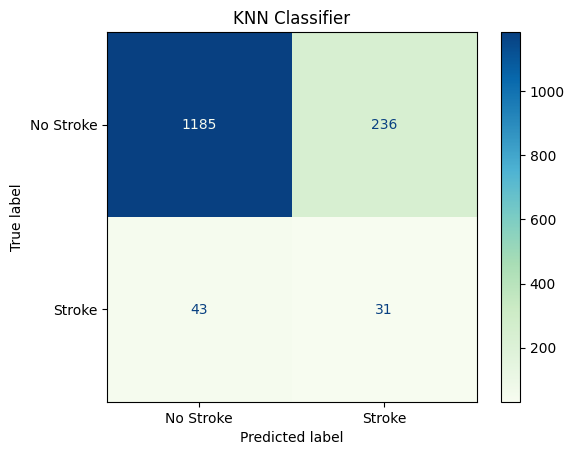

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=knn1
               ,title="KNN Classifier")

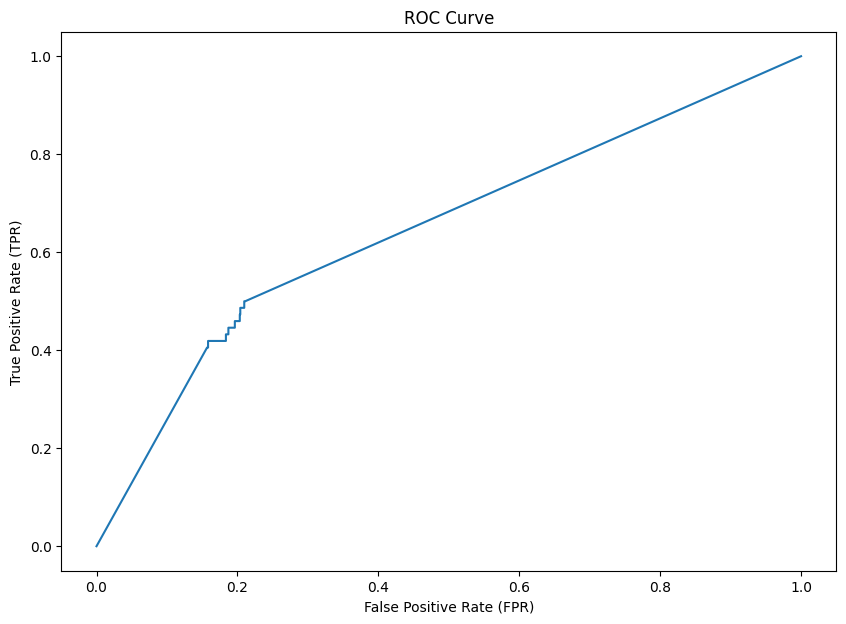

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
knn1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,knn1)

# **4.5. Logistic Regression Classifier**

In [ ]:
# Logistic Regression Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr1_param_grid = { 'C': np.logspace(-4, 4, 50),
                   'penalty' : ['l2']}

lr1_grid = GridSearchCV(LogisticRegression(),lr1_param_grid,refit=True,verbose=1,cv=5,scoring='f1')

lr1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l2']},
             scoring='f1', verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

lr1_grid.best_params_

{'C': 0.08685113737513521, 'penalty': 'l2'}

In [ ]:
# Logistic Regression Classifier

lr1=LogisticRegression(C=0.08685113737513521,penalty='l2',random_state=31)
lr1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
lr1_pred = lr1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

lr1_report = classification_report(brain_stroke_data_test_y,lr1_pred)

print(lr1_report)

              precision    recall  f1-score   support

           0       0.99      0.71      0.82      1421
           1       0.13      0.85      0.23        74

    accuracy                           0.71      1495
   macro avg       0.56      0.78      0.52      1495
weighted avg       0.95      0.71      0.79      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

lr1_report_dict =  classification_report(brain_stroke_data_test_y,lr1_pred,output_dict=True)

lr1_accuracy = lr1_report_dict['accuracy']
lr1_precision = lr1_report_dict['1']['precision']
lr1_recall = lr1_report_dict['1']['recall']
lr1_f1 = lr1_report_dict['1']['f1-score']

print("Accuracy             : ",lr1_accuracy)
print()
print("Precision ( Stroke ) : ",lr1_precision)
print("Recall    ( Stroke ) : ",lr1_recall)
print("F1-Score  ( Stroke ) : ",lr1_f1)

Accuracy             :  0.7123745819397993

Precision ( Stroke ) :  0.13070539419087138
Recall    ( Stroke ) :  0.8513513513513513
F1-Score  ( Stroke ) :  0.22661870503597123


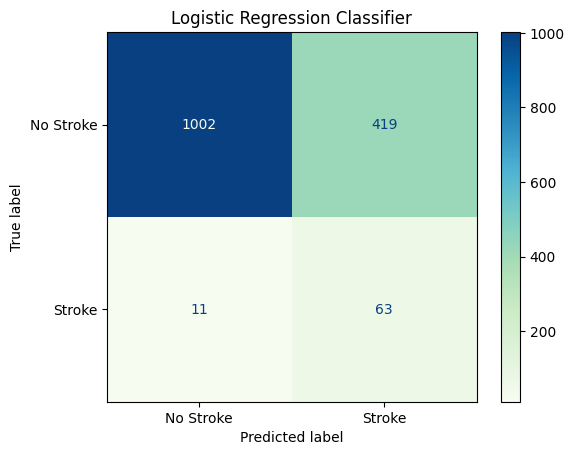

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=lr1
               ,title="Logistic Regression Classifier")

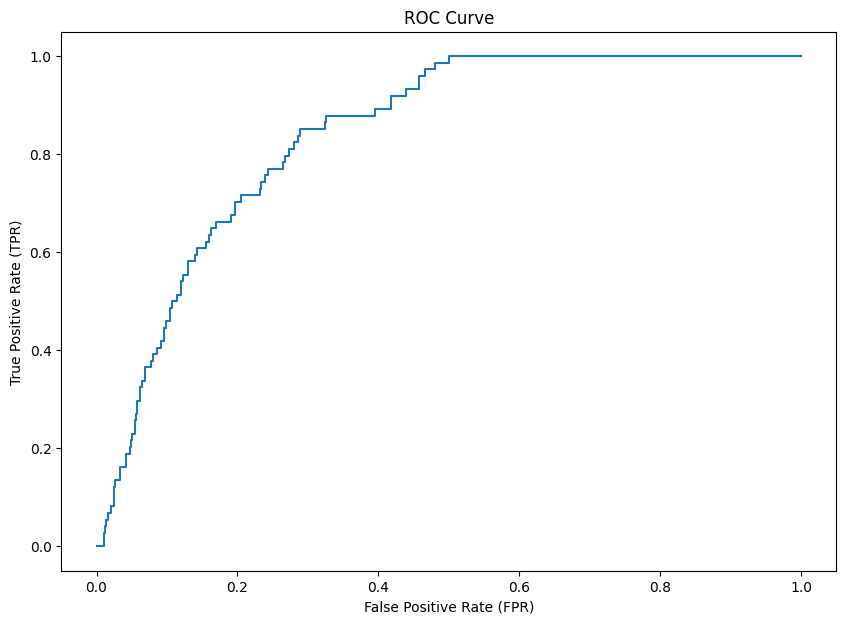

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
lr1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,lr1)

# **4.6. SGD Classifier**

In [ ]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

sgdc1 = SGDClassifier(random_state=24)
sgdc1 = sgdc1.fit(brain_stroke_data_train_x_smote, brain_stroke_data_train_y_smote)
calibrator = CalibratedClassifierCV(sgdc1,cv='prefit')
sgdc1_calibrated = calibrator.fit(brain_stroke_data_train_x_smote, brain_stroke_data_train_y_smote)
sgdc1_pred = sgdc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

sgdc1_report = classification_report(brain_stroke_data_test_y,sgdc1_pred)

print(sgdc1_report)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1421
           1       0.12      0.85      0.21        74

    accuracy                           0.68      1495
   macro avg       0.55      0.76      0.50      1495
weighted avg       0.95      0.68      0.77      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

sgdc1_report_dict =  classification_report(brain_stroke_data_test_y,sgdc1_pred,output_dict=True)

sgdc1_accuracy = sgdc1_report_dict['accuracy']
sgdc1_precision = sgdc1_report_dict['1']['precision']
sgdc1_recall = sgdc1_report_dict['1']['recall']
sgdc1_f1 = sgdc1_report_dict['1']['f1-score']

print("Accuracy             : ",sgdc1_accuracy)
print()
print("Precision ( Stroke ) : ",sgdc1_precision)
print("Recall    ( Stroke ) : ",sgdc1_recall)
print("F1-Score  ( Stroke ) : ",sgdc1_f1)

Accuracy             :  0.6782608695652174

Precision ( Stroke ) :  0.11819887429643527
Recall    ( Stroke ) :  0.8513513513513513
F1-Score  ( Stroke ) :  0.20757825370675453


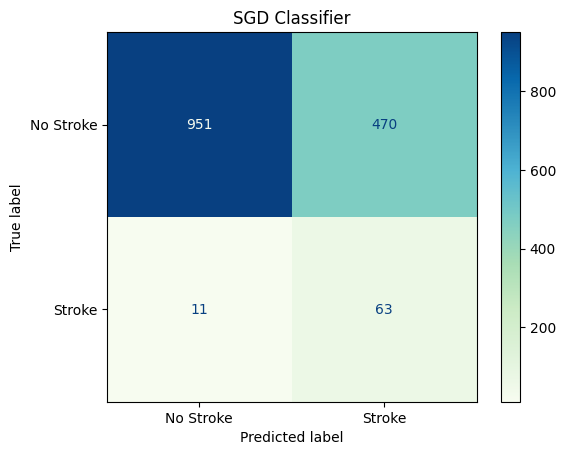

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=sgdc1
               ,title="SGD Classifier")

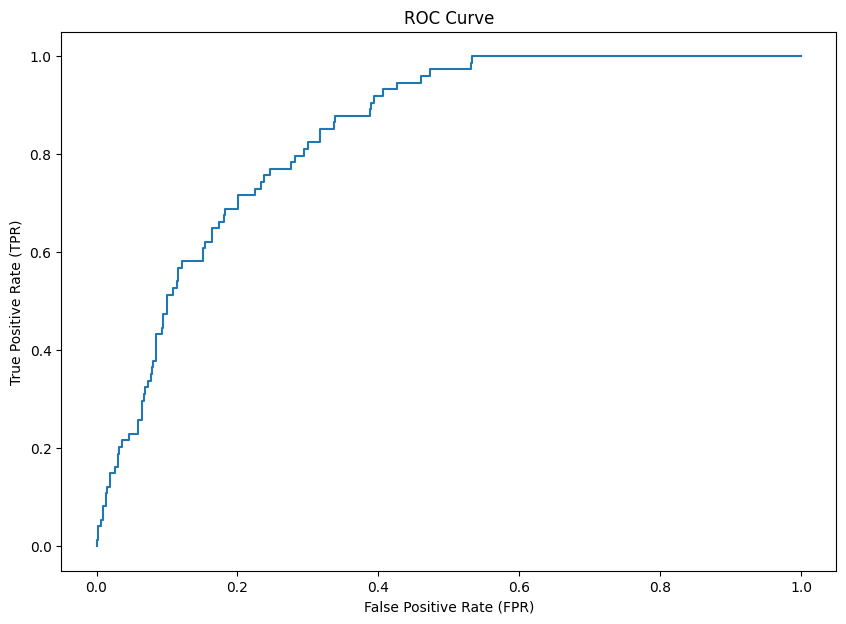

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
sgdc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,sgdc1_calibrated)

# **5. Ensemble Methods**

# **5.1. Random Forest Classifier**

In [ ]:
# Random Forest Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc1_param_grid = { 'n_estimators' : [2,3,4,5,7,8,11,15,18,27,33,40,50]}

rfc1_grid = GridSearchCV(RandomForestClassifier(),rfc1_param_grid,refit=True,verbose=1,cv=5)

rfc1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [2, 3, 4, 5, 7, 8, 11, 15, 18, 27, 33,
                                          40, 50]},
             verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

rfc1_grid.best_params_

{'n_estimators': 50}

In [ ]:
# Random Forest Classifier

rfc1 = RandomForestClassifier(n_estimators=40,criterion='entropy',max_depth=100,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,random_state=27)
rfc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
rfc1_pred = rfc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

rfc1_report = classification_report(brain_stroke_data_test_y,rfc1_pred)

print(rfc1_report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1421
           1       0.14      0.39      0.21        74

    accuracy                           0.86      1495
   macro avg       0.56      0.64      0.57      1495
weighted avg       0.92      0.86      0.89      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

rfc1_report_dict =  classification_report(brain_stroke_data_test_y,rfc1_pred,output_dict=True)

rfc1_accuracy = rfc1_report_dict['accuracy']
rfc1_precision = rfc1_report_dict['1']['precision']
rfc1_recall = rfc1_report_dict['1']['recall']
rfc1_f1 = rfc1_report_dict['1']['f1-score']

print("Accuracy             : ",rfc1_accuracy)
print()
print("Precision ( Stroke ) : ",rfc1_precision)
print("Recall    ( Stroke ) : ",rfc1_recall)
print("F1-Score  ( Stroke ) : ",rfc1_f1)

Accuracy             :  0.8555183946488294

Precision ( Stroke ) :  0.145
Recall    ( Stroke ) :  0.3918918918918919
F1-Score  ( Stroke ) :  0.2116788321167883


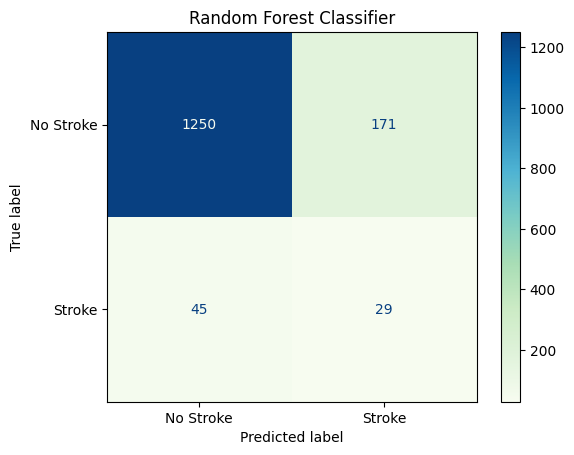

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=rfc1
               ,title="Random Forest Classifier")

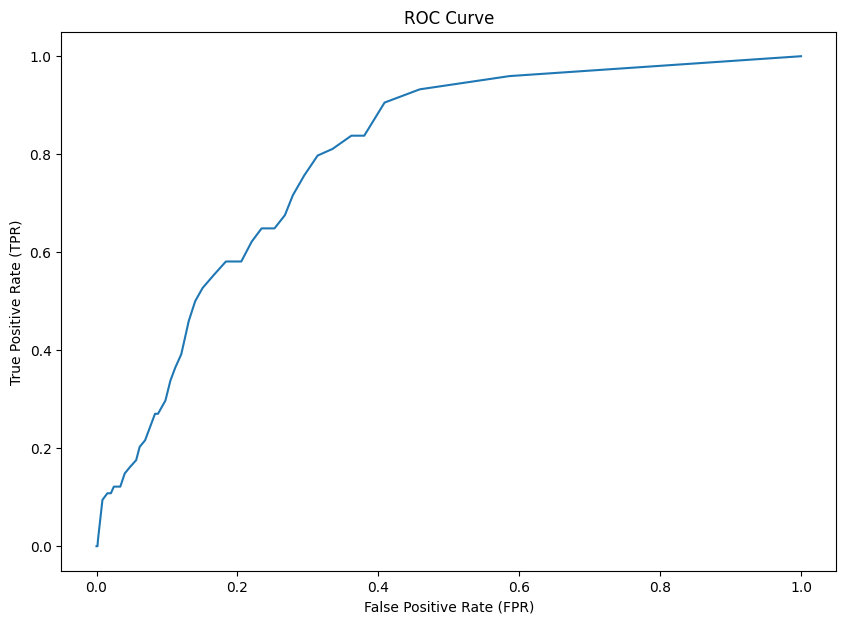

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
rfc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,rfc1)

# **5.2. Bagging Classifier**

In [ ]:
# Bagging Classifier

from sklearn.ensemble import BaggingClassifier

bgc1 = BaggingClassifier(estimator = svc1)
bgc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
bgc1_pred = bgc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

bgc1_report = classification_report(brain_stroke_data_test_y,bgc1_pred)

print(bgc1_report)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1421
           1       0.12      0.27      0.16        74

    accuracy                           0.86      1495
   macro avg       0.54      0.58      0.54      1495
weighted avg       0.92      0.86      0.89      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

bgc1_report_dict =  classification_report(brain_stroke_data_test_y,bgc1_pred,output_dict=True)

bgc1_accuracy = bgc1_report_dict['accuracy']
bgc1_precision = bgc1_report_dict['1']['precision']
bgc1_recall = bgc1_report_dict['1']['recall']
bgc1_f1 = bgc1_report_dict['1']['f1-score']

print("Accuracy             : ",bgc1_accuracy)
print()
print("Precision ( Stroke ) : ",bgc1_precision)
print("Recall    ( Stroke ) : ",bgc1_recall)
print("F1-Score  ( Stroke ) : ",bgc1_f1)

Accuracy             :  0.8615384615384616

Precision ( Stroke ) :  0.11560693641618497
Recall    ( Stroke ) :  0.2702702702702703
F1-Score  ( Stroke ) :  0.16194331983805668


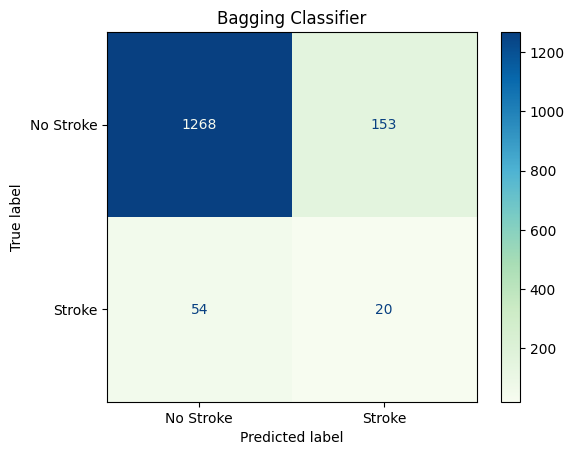

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=bgc1
               ,title="Bagging Classifier")

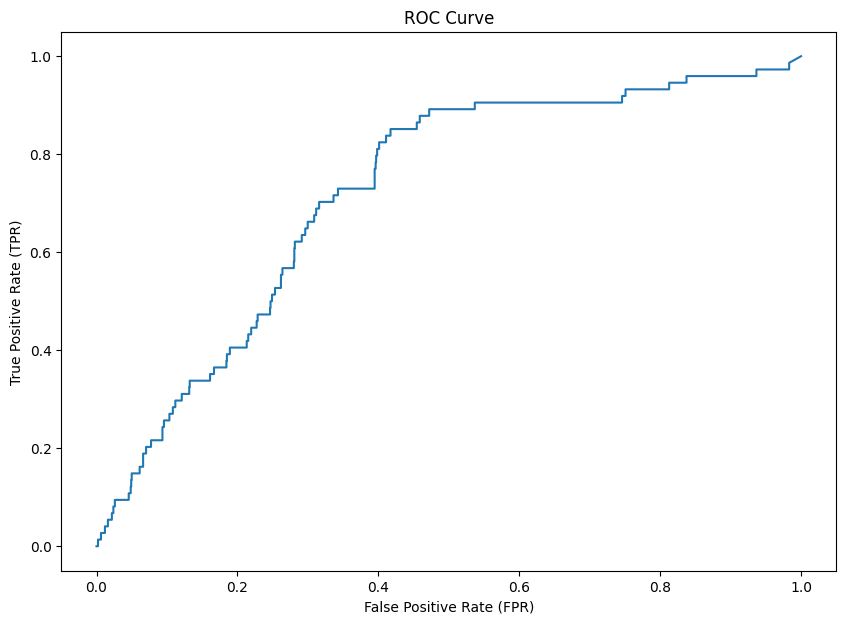

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
bgc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,bgc1)

# **5.3. AdaBoost Classifier**

In [ ]:
# AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

abc1 = AdaBoostClassifier(estimator = dt1,random_state=25)
abc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
abc1_pred = abc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

abc1_report = classification_report(brain_stroke_data_test_y,abc1_pred)

print(abc1_report)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1421
           1       0.17      0.57      0.26        74

    accuracy                           0.84      1495
   macro avg       0.57      0.71      0.58      1495
weighted avg       0.93      0.84      0.88      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

abc1_report_dict =  classification_report(brain_stroke_data_test_y,abc1_pred,output_dict=True)

abc1_accuracy = abc1_report_dict['accuracy']
abc1_precision = abc1_report_dict['1']['precision']
abc1_recall = abc1_report_dict['1']['recall']
abc1_f1 = abc1_report_dict['1']['f1-score']

print("Accuracy             : ",abc1_accuracy)
print()
print("Precision ( Stroke ) : ",abc1_precision)
print("Recall    ( Stroke ) : ",abc1_recall)
print("F1-Score  ( Stroke ) : ",abc1_f1)

Accuracy             :  0.8367892976588629

Precision ( Stroke ) :  0.16535433070866143
Recall    ( Stroke ) :  0.5675675675675675
F1-Score  ( Stroke ) :  0.25609756097560976


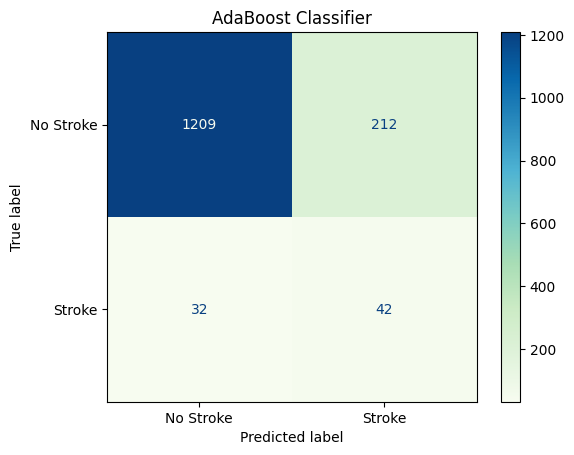

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=abc1
               ,title="AdaBoost Classifier")

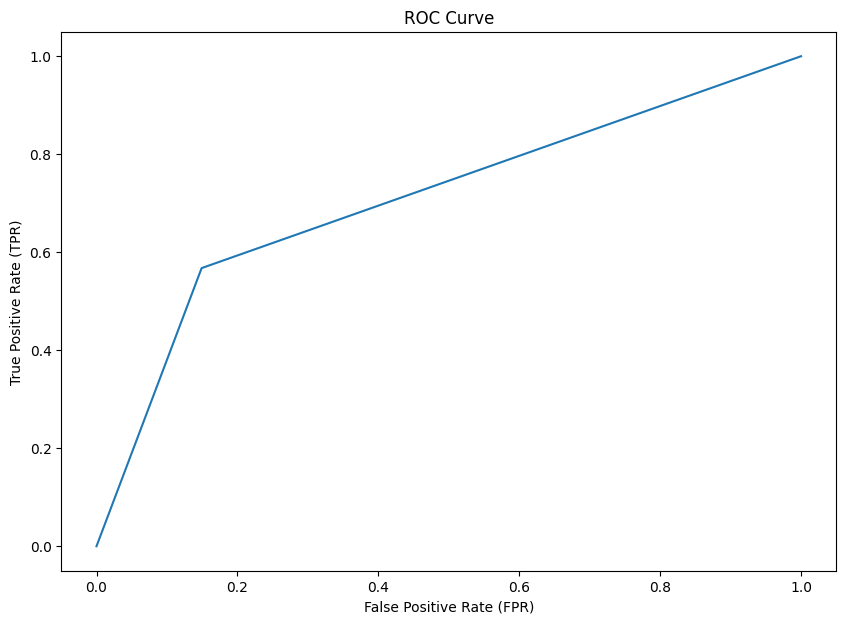

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
abc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,abc1)

# **5.4. LightGBM Classifier**

In [ ]:
# LightGBM Classifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbmc1 = lgb.LGBMClassifier()
lgbmc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
lgbmc1_pred = lgbmc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

lgbmc1_report = classification_report(brain_stroke_data_test_y,lgbmc1_pred)

print(lgbmc1_report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1421
           1       0.15      0.38      0.21        74

    accuracy                           0.86      1495
   macro avg       0.56      0.63      0.57      1495
weighted avg       0.92      0.86      0.89      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

lgbmc1_report_dict =  classification_report(brain_stroke_data_test_y,lgbmc1_pred,output_dict=True)

lgbmc1_accuracy = lgbmc1_report_dict['accuracy']
lgbmc1_precision = lgbmc1_report_dict['1']['precision']
lgbmc1_recall = lgbmc1_report_dict['1']['recall']
lgbmc1_f1 = lgbmc1_report_dict['1']['f1-score']

print("Accuracy             : ",lgbmc1_accuracy)
print()
print("Precision ( Stroke ) : ",lgbmc1_precision)
print("Recall    ( Stroke ) : ",lgbmc1_recall)
print("F1-Score  ( Stroke ) : ",lgbmc1_f1)

Accuracy             :  0.8595317725752508

Precision ( Stroke ) :  0.14583333333333334
Recall    ( Stroke ) :  0.3783783783783784
F1-Score  ( Stroke ) :  0.21052631578947367


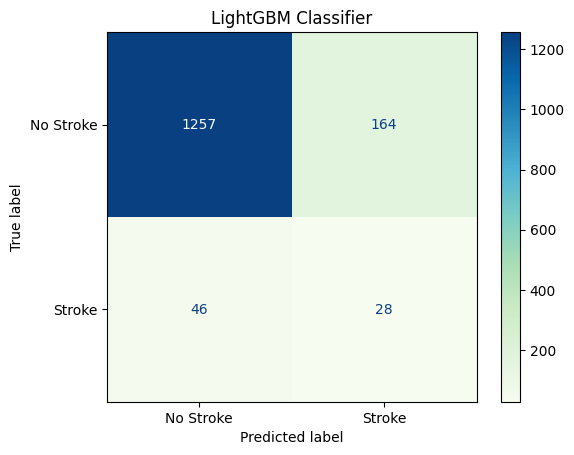

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=lgbmc1
               ,title="LightGBM Classifier")

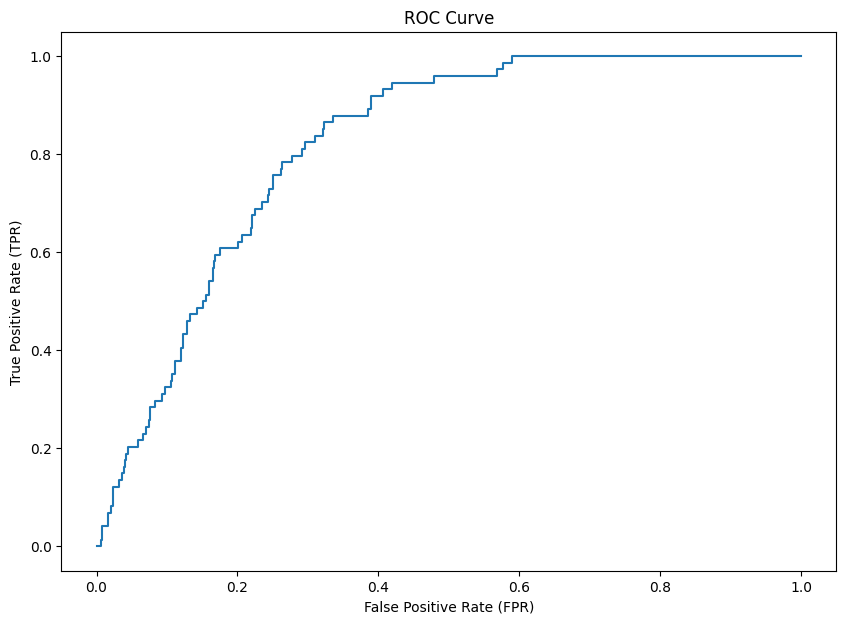

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
lgbmc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,lgbmc1)

# **5.5. XGBoost Classifier**

In [ ]:
# XGBoost Classifier Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgbc1_param_grid = {"subsample":[0.75, 1],
                    "colsample_bytree":[0.75, 1],
                    "max_depth":[2, 6],
                    "min_child_weight":[1, 5],
                    "learning_rate":[0.1, 0.01]}

xgbc1_grid = GridSearchCV(XGBClassifier(),xgbc1_param_grid,refit=True,verbose=1,cv=5,scoring='f1')

xgbc1_grid.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 5], 'subsample': [0.75, 1]},
             scoring='f1', verbose=1)

In [ ]:
# Finding out the optimal hyperparameters

xgbc1_grid.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'subsample': 0.75}

In [ ]:
# XGBoost Classifier

xgbc1 = XGBClassifier(colsample_bytree=1,learning_rate=0.1,max_depth=6,min_child_weight=1,subsample=0.75)
xgbc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
xgbc1_pred = xgbc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

xgbc1_report = classification_report(brain_stroke_data_test_y,xgbc1_pred)

print(xgbc1_report)

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1421
           1       0.14      0.41      0.21        74

    accuracy                           0.85      1495
   macro avg       0.55      0.64      0.56      1495
weighted avg       0.92      0.85      0.88      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

xgbc1_report_dict =  classification_report(brain_stroke_data_test_y,xgbc1_pred,output_dict=True)

xgbc1_accuracy = xgbc1_report_dict['accuracy']
xgbc1_precision = xgbc1_report_dict['1']['precision']
xgbc1_recall = xgbc1_report_dict['1']['recall']
xgbc1_f1 = xgbc1_report_dict['1']['f1-score']

print("Accuracy             : ",xgbc1_accuracy)
print()
print("Precision ( Stroke ) : ",xgbc1_precision)
print("Recall    ( Stroke ) : ",xgbc1_recall)
print("F1-Score  ( Stroke ) : ",xgbc1_f1)

Accuracy             :  0.8454849498327759

Precision ( Stroke ) :  0.1382488479262673
Recall    ( Stroke ) :  0.40540540540540543
F1-Score  ( Stroke ) :  0.2061855670103093


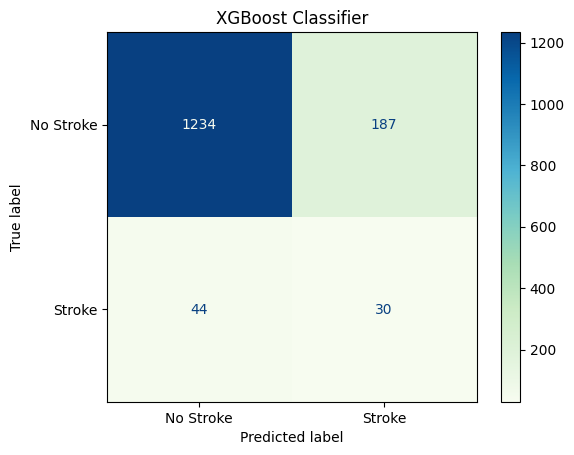

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=xgbc1
               ,title="XGBoost Classifier")

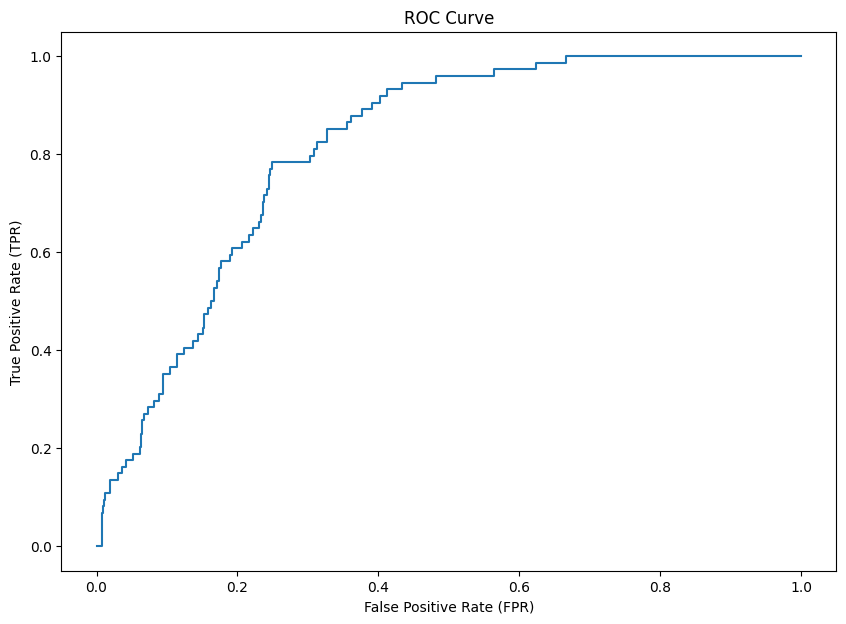

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
xgbc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,xgbc1)

# **5.6. Voting Classifier**

In [ ]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier

vc1 = VotingClassifier(estimators = [('nb',nb1),('lr',lr1),('svc',svc1),('knn',knn1),('dt',dt1)],voting='soft')
vc1.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote)
vc1_pred = vc1.predict(brain_stroke_data_test_x)

In [ ]:
# Classification Report

vc1_report = classification_report(brain_stroke_data_test_y,vc1_pred)

print(vc1_report)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89      1421
           1       0.13      0.50      0.21        74

    accuracy                           0.81      1495
   macro avg       0.55      0.66      0.55      1495
weighted avg       0.93      0.81      0.86      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

vc1_report_dict =  classification_report(brain_stroke_data_test_y,vc1_pred,output_dict=True)

vc1_accuracy = vc1_report_dict['accuracy']
vc1_precision = vc1_report_dict['1']['precision']
vc1_recall = vc1_report_dict['1']['recall']
vc1_f1 = vc1_report_dict['1']['f1-score']

print("Accuracy             : ",vc1_accuracy)
print()
print("Precision ( Stroke ) : ",vc1_precision)
print("Recall    ( Stroke ) : ",vc1_recall)
print("F1-Score  ( Stroke ) : ",vc1_f1)

Accuracy             :  0.8133779264214047

Precision ( Stroke ) :  0.13261648745519714
Recall    ( Stroke ) :  0.5
F1-Score  ( Stroke ) :  0.20963172804532576


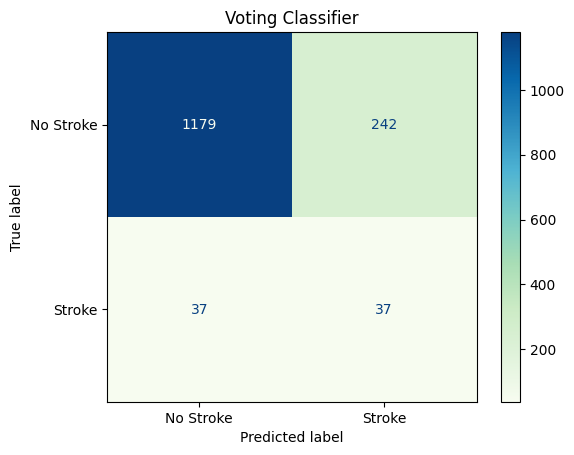

In [ ]:
# Confusion Matrix

ConfusionMatrix(x=brain_stroke_data_test_x
               ,y=brain_stroke_data_test_y
               ,m=vc1
               ,title="Voting Classifier")

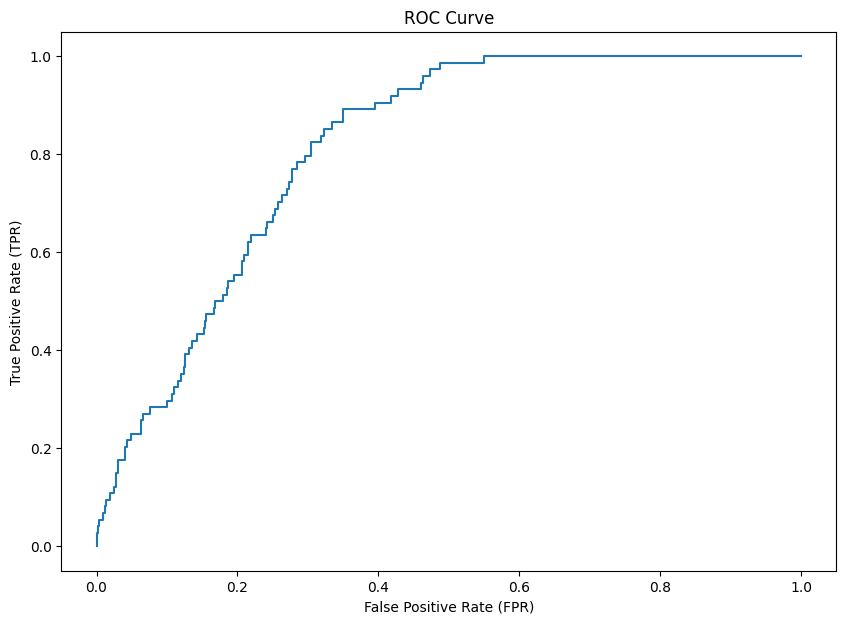

In [ ]:
# ROC Curve and AUC

plt.figure(figsize=(10,7))
vc1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,vc1)

# **6. Deep Learning**

# **6.1. Multi Layer Perceptron**

In [ ]:
# Multi Layer Perceptron

import tensorflow as tf
from tensorflow import keras
from keras import layers

es=tf.keras.callbacks.EarlyStopping(

    min_delta=0.001,
    patience=10,
    restore_best_weights=True

)

model=keras.Sequential([

    keras.layers.Dense(10,input_shape=[10], activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")

])

model.compile(
   loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']
)

model_history = model.fit(brain_stroke_data_train_x_smote,brain_stroke_data_train_y_smote,epochs=10)

mlp1_pred_ = model.predict(brain_stroke_data_test_x)
mlp1_pred  =  np.where(mlp1_pred_>0.5,1,0)

Epoch 1/10
186/186 [==============================] - 2s 2ms/step - loss: 0.6692 - accuracy: 0.6068
Epoch 2/10
186/186 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7145
Epoch 3/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4984 - accuracy: 0.7763
Epoch 4/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4838 - accuracy: 0.7906
Epoch 5/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8148
Epoch 6/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8165
Epoch 7/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8210
Epoch 8/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4252 - accuracy: 0.8237
Epoch 9/10
186/186 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8304
Epoch 10/10
47/47 [==============================] - 0s 1ms/step


In [ ]:
# Classification Report

mlp1_report = classification_report(brain_stroke_data_test_y,mlp1_pred)

print(mlp1_report)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1421
           1       0.13      0.84      0.22        74

    accuracy                           0.71      1495
   macro avg       0.56      0.77      0.52      1495
weighted avg       0.95      0.71      0.79      1495



In [ ]:
# Accuracy, Precision, Recall, F1 Score on the Original Test Dataset

mlp1_report_dict =  classification_report(brain_stroke_data_test_y,mlp1_pred,output_dict=True)

mlp1_accuracy = mlp1_report_dict['accuracy']
mlp1_precision = mlp1_report_dict['1']['precision']
mlp1_recall = mlp1_report_dict['1']['recall']
mlp1_f1 = mlp1_report_dict['1']['f1-score']

print("Accuracy             : ",mlp1_accuracy)
print()
print("Precision ( Stroke ) : ",mlp1_precision)
print("Recall    ( Stroke ) : ",mlp1_recall)
print("F1-Score  ( Stroke ) : ",mlp1_f1)

Accuracy             :  0.7090301003344481

Precision ( Stroke ) :  0.12783505154639174
Recall    ( Stroke ) :  0.8378378378378378
F1-Score  ( Stroke ) :  0.221824686940966


Text(0.5, 1.0, 'Accuracy-Epoch Graph')

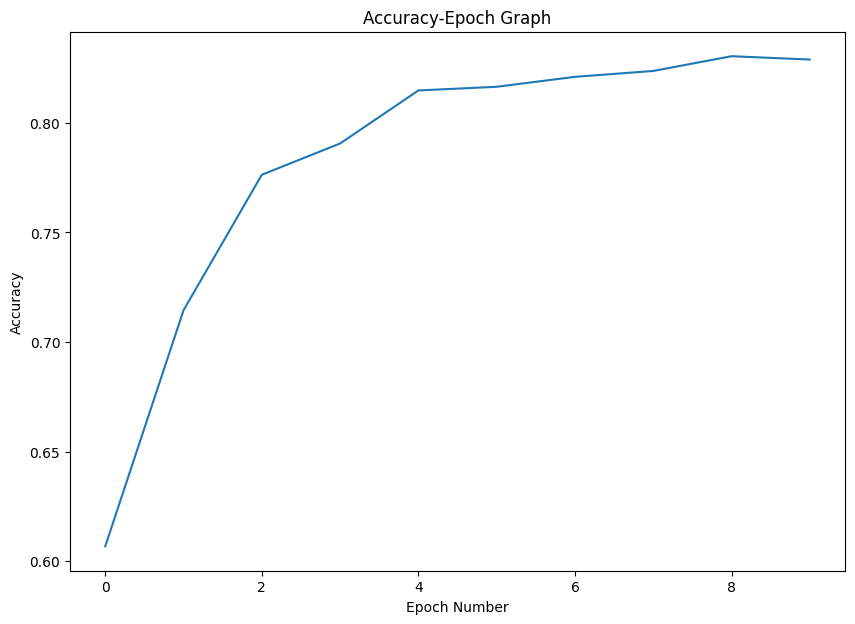

In [ ]:
# Accuracy-Epoch Graph

plt.figure(figsize=(10,7))
plt.plot(model_history.history["accuracy"])
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.title("Accuracy-Epoch Graph")

Text(0.5, 1.0, 'Loss-Epoch Graph')

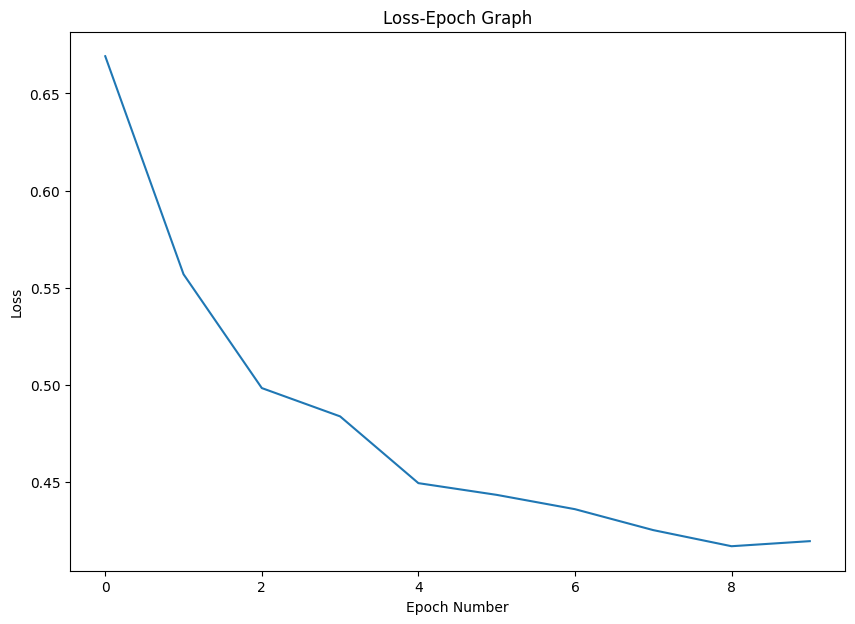

In [ ]:
# Loss-Epoch Graph

plt.figure(figsize=(10,7))
plt.plot(model_history.history["loss"])
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.title("Loss-Epoch Graph")

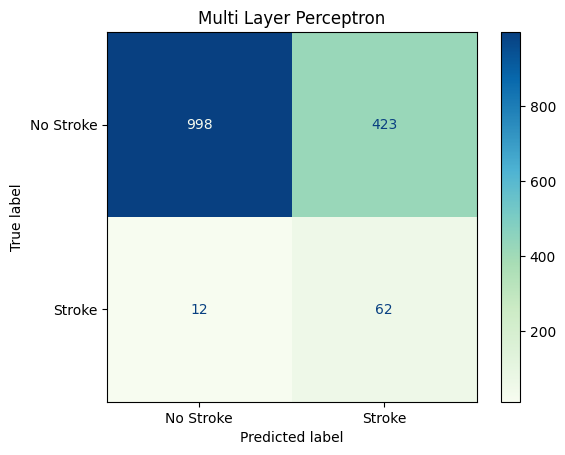

In [ ]:
# Confusion Matrix

mlp1_cm = confusion_matrix(brain_stroke_data_test_y,mlp1_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=mlp1_cm,display_labels=['No Stroke','Stroke'])
disp.plot(cmap="GnBu")

plt.title("Multi Layer Perceptron")
plt.show()

Text(0, 0.5, 'True Positive Rate (TPR)')

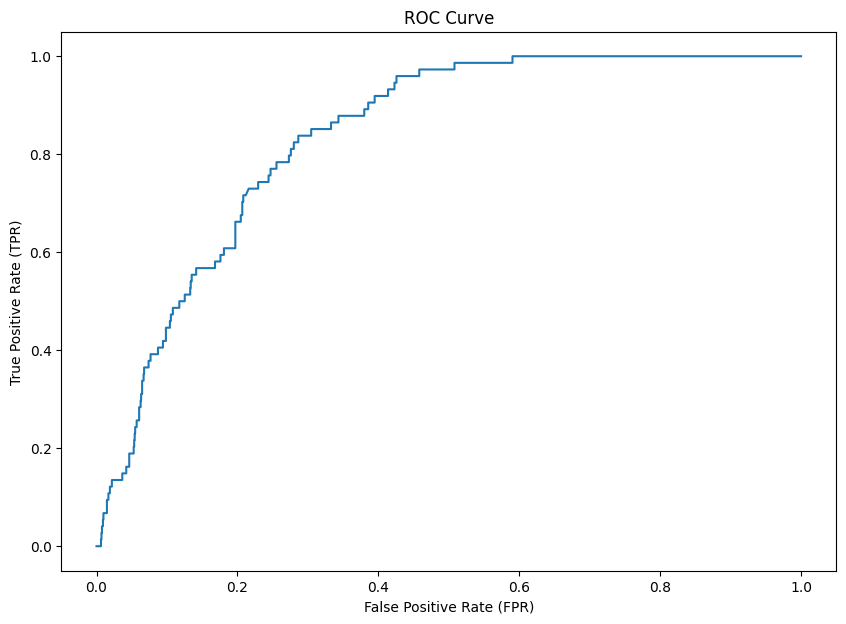

In [ ]:
# ROC Curve and AUC

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(brain_stroke_data_test_y,mlp1_pred_)
mlp1_auc = auc(fpr,tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label='MLP')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

# **7. Conclusion**

In [ ]:
# Summary of all the models

performance_comparision = pd.DataFrame({
    "Classifier" : ["Decision Tree","Naive Bayes","Support Vector Machine","KNN","Random Forest","Bagging Classifier","AdaBoost","Logistic Regression","SGD","XGBoost","LightGBM","Voting Classifier","Multi Layer Perceptron"],
    "Accuracy ( Overall )" : [dt1_accuracy,nb1_accuracy,svc1_accuracy,knn1_accuracy,rfc1_accuracy,bgc1_accuracy,abc1_accuracy,lr1_accuracy,sgdc1_accuracy,xgbc1_accuracy,lgbmc1_accuracy,vc1_accuracy,mlp1_accuracy],
    "Precision ( Stroke )" : [dt1_precision,nb1_precision,svc1_precision,knn1_precision,rfc1_precision,bgc1_precision,abc1_precision,lr1_precision,sgdc1_precision,xgbc1_precision,lgbmc1_precision,vc1_precision,mlp1_precision],
    "Recall ( Stroke )" : [dt1_recall,nb1_recall,svc1_recall,knn1_recall,rfc1_recall,bgc1_recall,abc1_recall,lr1_recall,sgdc1_recall,xgbc1_recall,lgbmc1_recall,vc1_recall,mlp1_recall],
    "F1-Score ( Stroke )" : [dt1_f1,nb1_f1,svc1_f1,knn1_f1,rfc1_f1,bgc1_f1,abc1_f1,lr1_f1,sgdc1_f1,xgbc1_f1,lgbmc1_f1,vc1_f1,mlp1_f1],
    "AUC" : [dt1_auc,nb1_auc,svc1_auc,knn1_auc,rfc1_auc,bgc1_auc,abc1_auc,lr1_auc,sgdc1_auc,xgbc1_auc,lgbmc1_auc,vc1_auc,mlp1_auc]
})

performance_comparision = performance_comparision.sort_values(by=["F1-Score ( Stroke )"],ascending=False)
performance_comparision.index = np.arange(1, len(performance_comparision) + 1)
performance_comparision

,Classifier,Accuracy ( Overall ),Precision ( Stroke ),Recall ( Stroke ),F1-Score ( Stroke ),AUC
1,AdaBoost,0.836789,0.165354,0.567568,0.256098,0.709188
2,Logistic Regression,0.712375,0.130705,0.851351,0.226619,0.840843
3,Naive Bayes,0.731773,0.130926,0.783784,0.224371,0.809689
4,Multi Layer Perceptron,0.709030,0.127835,0.837838,0.221825,0.836193
5,Random Forest,0.855518,0.145000,0.391892,0.211679,0.795314
6,LightGBM,0.859532,0.145833,0.378378,0.210526,0.818999
7,Voting Classifier,0.813378,0.132616,0.500000,0.209632,0.811572
8,SGD,0.678261,0.118199,0.851351,0.207578,0.841975
9,XGBoost,0.845485,0.138249,0.405405,0.206186,0.813474
10,Decision Tree,0.842809,0.129032,0.378378,0.192440,0.622687


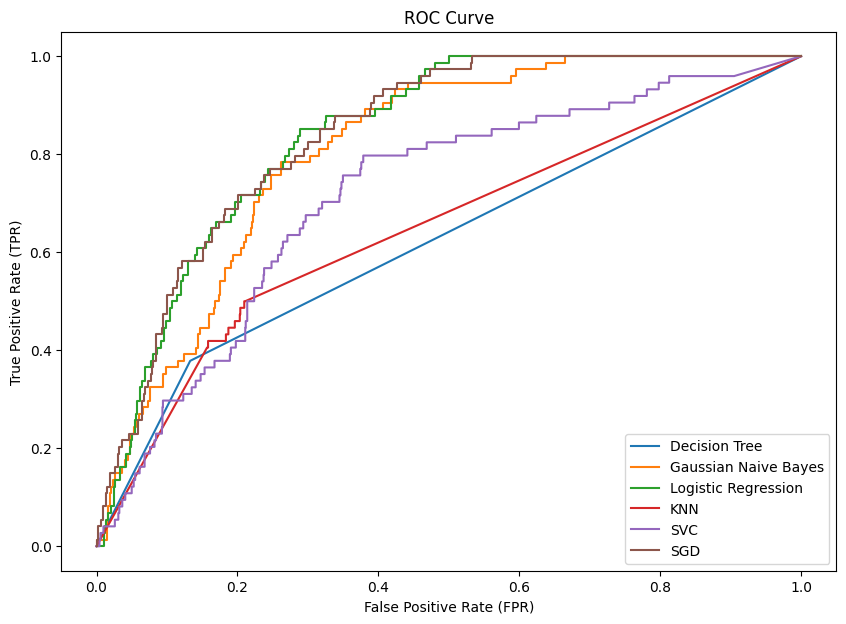

In [ ]:
# ROC for Single Models

single_models = [[dt1,'Decision Tree'],[nb1,'Gaussian Naive Bayes'],[lr1,'Logistic Regression'],[knn1,'KNN'],[svc1,'SVC'],[sgdc1_calibrated,'SGD']]

plt.figure(figsize=(10,7))

for i in single_models:

  dt1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,i[0],i[1])
  plt.legend(loc='lower right')

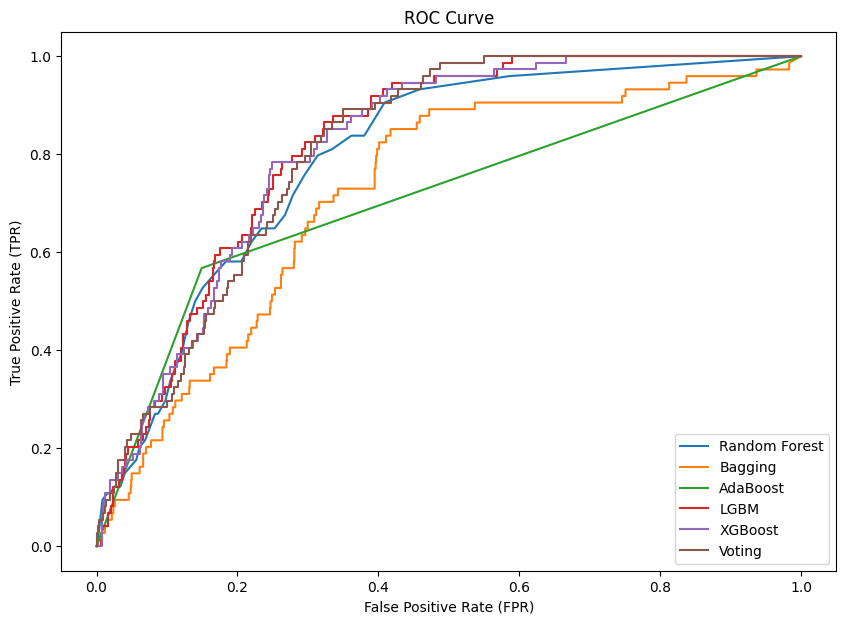

In [ ]:
# ROC for Ensemble Models

ensemble_models = [[rfc1,'Random Forest'],[bgc1,'Bagging'],[abc1,'AdaBoost'],[lgbmc1,'LGBM'],[xgbc1,'XGBoost'],[vc1,'Voting']]

plt.figure(figsize=(10,7))

for i in ensemble_models:

  dt1_auc = ROC(brain_stroke_data_test_x,brain_stroke_data_test_y,i[0],i[1])
  plt.legend(loc='lower right')